## All the rough codes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Corrfunc.theory.DD import DD
from sklearn.neighbors import KernelDensity
from scipy.stats import norm
import scipy.optimize as spo

DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

def pow_func(r, A, alpha):
    return A * np.power(r, -alpha)

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 14}

import matplotlib
matplotlib.rc('font', **font)

In [2]:
import numpy as np

# Get all text file paths in the data folder
file_paths = ['/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt',
 '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt',
 '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt',
 '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_024.txt',
 '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_020.txt',
 '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_019.txt',
 '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_018.txt']

# Initialize an empty dictionary to store the arrays for each file
file_arrays = {}

# Read each file and extract the desired columns
for file_path in file_paths:
    x_coordinates = []
    y_coordinates = []
    z_coordinates = []
    accretion_rates = []
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            columns = line.split()
            x_coordinates.append(float(columns[2]))  # Fix: Use columns[3] for x coordinate
            y_coordinates.append(float(columns[3]))  # Fix: Use columns[4] for y coordinate
            z_coordinates.append(float(columns[4]))  # Fix: Use columns[5] for z coordinate
            accretion_rates.append(float(columns[8]))
    
    # Store the arrays in the dictionary using the file path as the key
    file_arrays[file_path] = {
        'x_coordinates': np.array(x_coordinates),
        'y_coordinates': np.array(y_coordinates),
        'z_coordinates': np.array(z_coordinates),
        'accretion_rates': np.array(accretion_rates)
    }

# Print the arrays for each file
for file_path, arrays in file_arrays.items():
    print("File:", file_path)
    print("X Coordinates:", arrays['x_coordinates'])
    print("Y Coordinates:", arrays['y_coordinates'])
    print("Z Coordinates:", arrays['z_coordinates'])
    print("Accretion Rates:", arrays['accretion_rates'])
    print()

File: /home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt
X Coordinates: [64958.36 47851.68 29848.42 ... 94077.15 41319.44 41366.41]
Y Coordinates: [28551.5  85669.85 62413.66 ... 65677.22 61497.12 61047.71]
Z Coordinates: [  86.23714 -103.1571   -49.71245 ...  270.8329  -181.5829  -737.1361 ]
Accretion Rates: [0.00099087 0.00094861 0.00062796 ... 0.00026968 0.00036953 0.00034172]

File: /home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt
X Coordinates: [61469.64 89272.82 20508.27 ... 35610.27 10024.92 12166.36]
Y Coordinates: [34244.26 74603.05 87456.69 ... 90063.8  72257.88 60024.74]
Z Coordinates: [ 468.3003   462.6008   136.2574  ... -229.5797  -404.6429    66.65427]
Accretion Rates: [3.725515e-09 4.890826e-04 1.993965e-03 ... 2.616124e-04 8.978967e-04
 3.078784e-04]

File: /home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt
X Coordinates: [93100.8  37024.08 45056.39 ... 44554.91 33862.12 51509.92]
Y Coordin

In [5]:
import numpy as np

max_z = -np.inf
min_z = np.inf

for file_name, file_data in file_arrays.items():
    z_coordinates = file_data['z_coordinates']
    max_z = max(max_z, np.max(z_coordinates))
    min_z = min(min_z, np.min(z_coordinates))

print("Maximum z coordinate:", max_z)
print("Minimum z coordinate:", min_z)

Maximum z coordinate: 2079.844
Minimum z coordinate: -1443.63


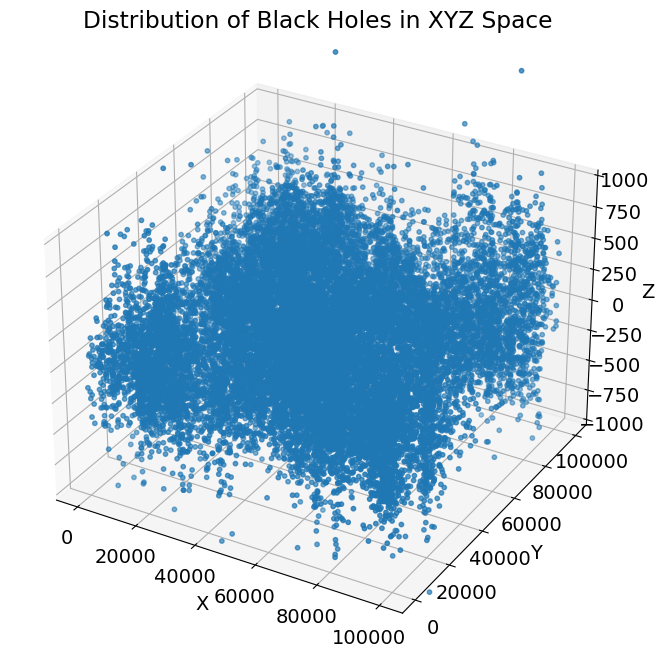

In [6]:
import matplotlib.pyplot as plt

# Get the arrays for the first file
file_path = file_paths[0]
arrays = file_arrays[file_path]

# Extract the x, y, z coordinates
x_coordinates = arrays['x_coordinates']
y_coordinates = arrays['y_coordinates']
z_coordinates = arrays['z_coordinates']

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coordinates, y_coordinates, z_coordinates, s=10)  # Decrease marker size

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Distribution of Black Holes in XYZ Space')

# Set z-axis limits
ax.set_zlim(-1000, 1000)  # Adjust the z-axis limits according to your desired range

# Show the plot
plt.show()

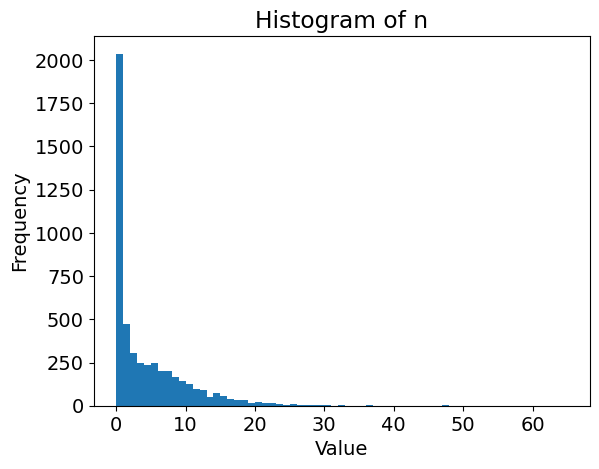

In [7]:
# Determine the range of x, y, and z coordinates
x_range = (np.min(x_coordinates), np.max(x_coordinates))
y_range = (np.min(y_coordinates), np.max(y_coordinates))
z_range = (np.min(z_coordinates), np.max(z_coordinates))

# Define the pixel size
pixel_size = 2000

# Calculate the number of pixels in each axis based on the desired pixel size
num_pixels_x = int((x_range[1] - x_range[0]) / pixel_size) + 1
num_pixels_y = int((y_range[1] - y_range[0]) / pixel_size) + 1
num_pixels_z = int((z_range[1] - z_range[0]) / pixel_size) + 1

# Create empty arrays to store the pixel indices and the number of black holes in each pixel
pixel_indices_x = np.zeros_like(x_coordinates, dtype=int)
pixel_indices_y = np.zeros_like(y_coordinates, dtype=int)
pixel_indices_z = np.zeros_like(z_coordinates, dtype=int)
pixel_counts = np.zeros((num_pixels_x, num_pixels_y, num_pixels_z), dtype=int)

# Iterate over the black hole coordinates and determine the corresponding pixel indices
for i in range(len(x_coordinates)):
    pixel_index_x = int((x_coordinates[i] - x_range[0]) / pixel_size)
    pixel_index_y = int((y_coordinates[i] - y_range[0]) / pixel_size)
    pixel_index_z = int((z_coordinates[i] - z_range[0]) / pixel_size)
    
    # Increment the pixel value for each black hole
    pixel_counts[pixel_index_x, pixel_index_y, pixel_index_z] += 1

# Calculate the number of black holes in each pixel
n = pixel_counts

import matplotlib.pyplot as plt

# Your code to calculate the histogram values (n) goes here

# Specify the range of integer bins
bins = range(int(n.min()), int(n.max()) + 2)

# Create the histogram
plt.hist(n.flatten(), bins=bins)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of n')

# Display the histogram
plt.show()

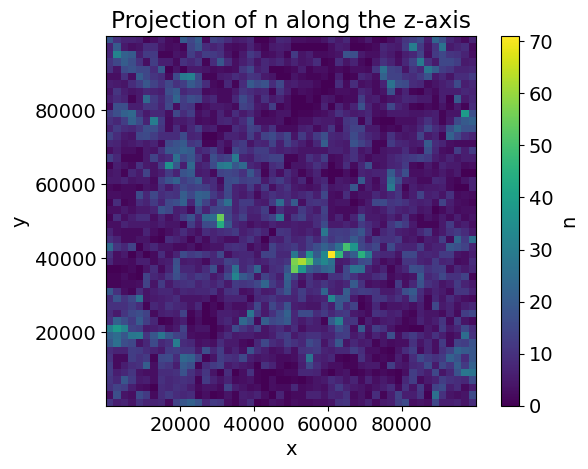

In [8]:
import matplotlib.pyplot as plt

# Create the projection along the z-axis
projection = n.sum(axis=2)

# Create the color plot
plt.imshow(projection, cmap='viridis', origin='lower', extent=[x_range[0], x_range[1], y_range[0], y_range[1]])
plt.colorbar(label='n')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Projection of n along the z-axis')
plt.show()

In [9]:
import numpy as np

file_paths = ['/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_024.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_020.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_019.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_018.txt']

n_arrays = []

for file_path in file_paths:
    # Load the data from the file
    data = np.loadtxt(file_path)
    
    # Extract the x, y, and z coordinates
    x_coordinates = data[:, 2]
    y_coordinates = data[:, 3]
    z_coordinates = data[:, 4]
    
    # Define the number of pixels in each dimension
    num_pixels_x = 50
    num_pixels_y = 50
    num_pixels_z = 2
    
    # Calculate the pixel size in each dimension
    x_range = (0, 100000) #(np.min(x_coordinates), np.max(x_coordinates))
    y_range = (0, 100000) #(np.min(y_coordinates), np.max(y_coordinates))
    z_range = (-1444, 2080) #(np.min(z_coordinates), np.max(z_coordinates))
    
    pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
    pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y
    pixel_size_z = (z_range[1] - z_range[0]) / num_pixels_z
    
    # Calculate the pixel indices for each coordinate
    pixel_indices_x = ((x_coordinates - x_range[0]) / pixel_size_x).astype(int)
    pixel_indices_y = ((y_coordinates - y_range[0]) / pixel_size_y).astype(int)
    pixel_indices_z = ((z_coordinates - z_range[0]) / pixel_size_z).astype(int)
    
    # Create an empty n(x, y, z) array
    n_array = np.zeros((num_pixels_x, num_pixels_y, num_pixels_z))
    
    # Count the number of particles in each pixel
    for i in range(len(x_coordinates)):
        n_array[pixel_indices_x[i], pixel_indices_y[i], pixel_indices_z[i]] += 1
    
    n_arrays.append(n_array)

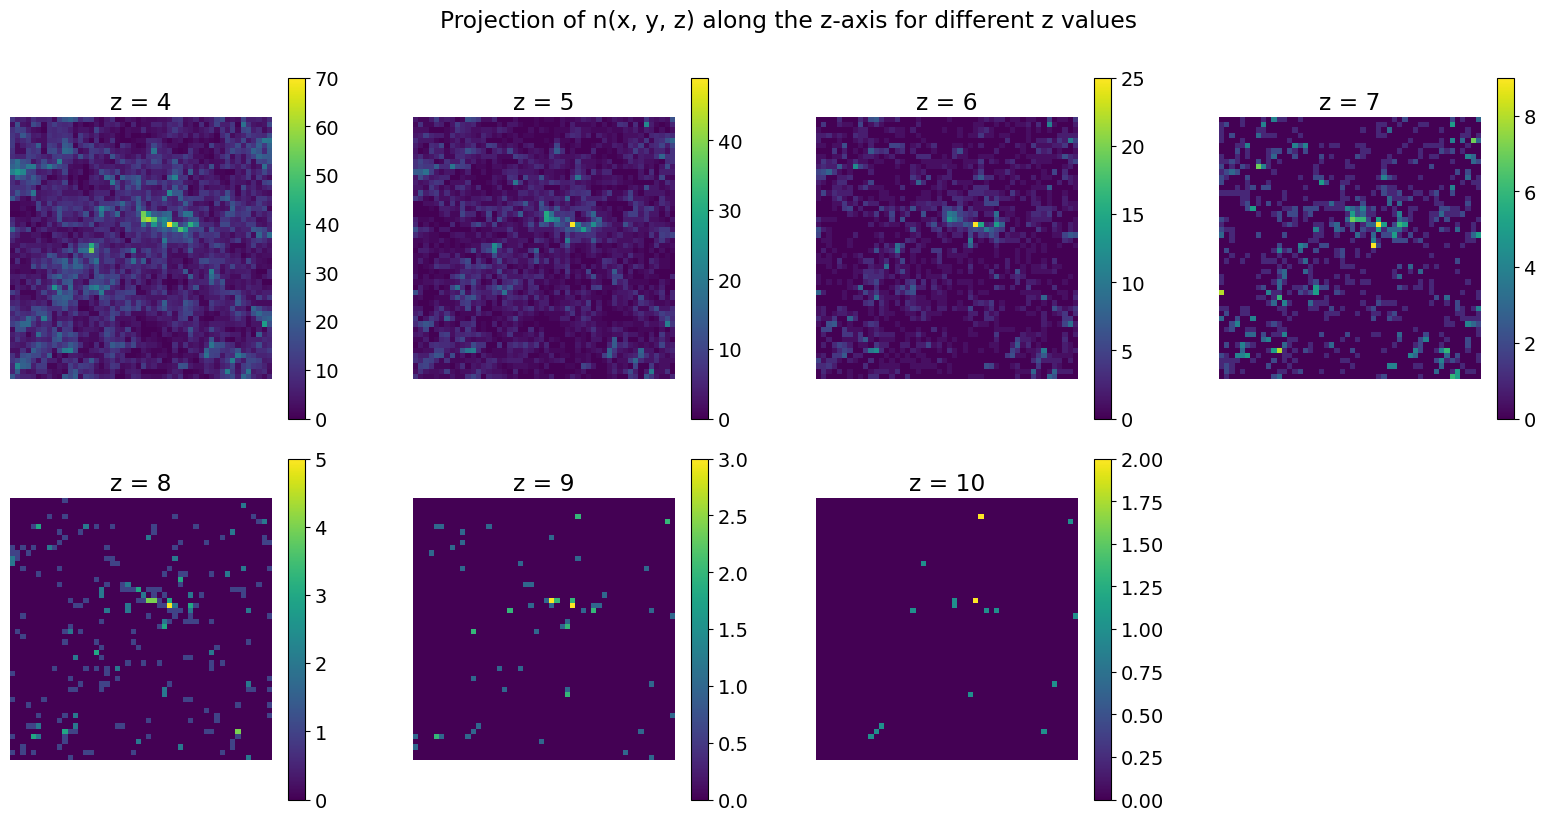

In [10]:
import matplotlib.pyplot as plt     

# Define the number of rows and columns for the subplots
n_rows = 2
n_cols = 4

# Create the figure and subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))

# # Variable to hold the last image object
# im = None

# Iterate through the arrays and create color plots
for i, arr in enumerate(n_arrays):
    # Project the array along axis 2
    projected_arr = arr.sum(axis=2)
    
    # Determine the row and column index for the subplot
    row_idx = i // n_cols
    col_idx = i % n_cols
    
    # Plot the color plot in the corresponding subplot
    im = axs[row_idx, col_idx].imshow(projected_arr, cmap='viridis')
    axs[row_idx, col_idx].set_title(f'z = {i+4}')
    axs[row_idx, col_idx].axis('off')

    # Create a colorbar for the current subplot
    fig.colorbar(im, ax=axs[row_idx, col_idx])

# Adjust the spacing between subplots
plt.tight_layout()
plt.suptitle('Projection of n(x, y, z) along the z-axis for different z values', y=1.05)

# # Add a colorbar using the last image object
# fig.colorbar(im, ax=axs.ravel().tolist())

axs[1, 3].set_axis_off()

# Show the plot
plt.show()

In [11]:
import numpy as np

# Create a list to store the new arrays
nz_arrays = []

# Iterate over each array in n_arrays
for arr in n_arrays:
    # Take the sum along axis 3
    sum_arr = np.sum(arr, axis=2)
    # Append the sum array to the list
    nz_arrays.append(sum_arr)

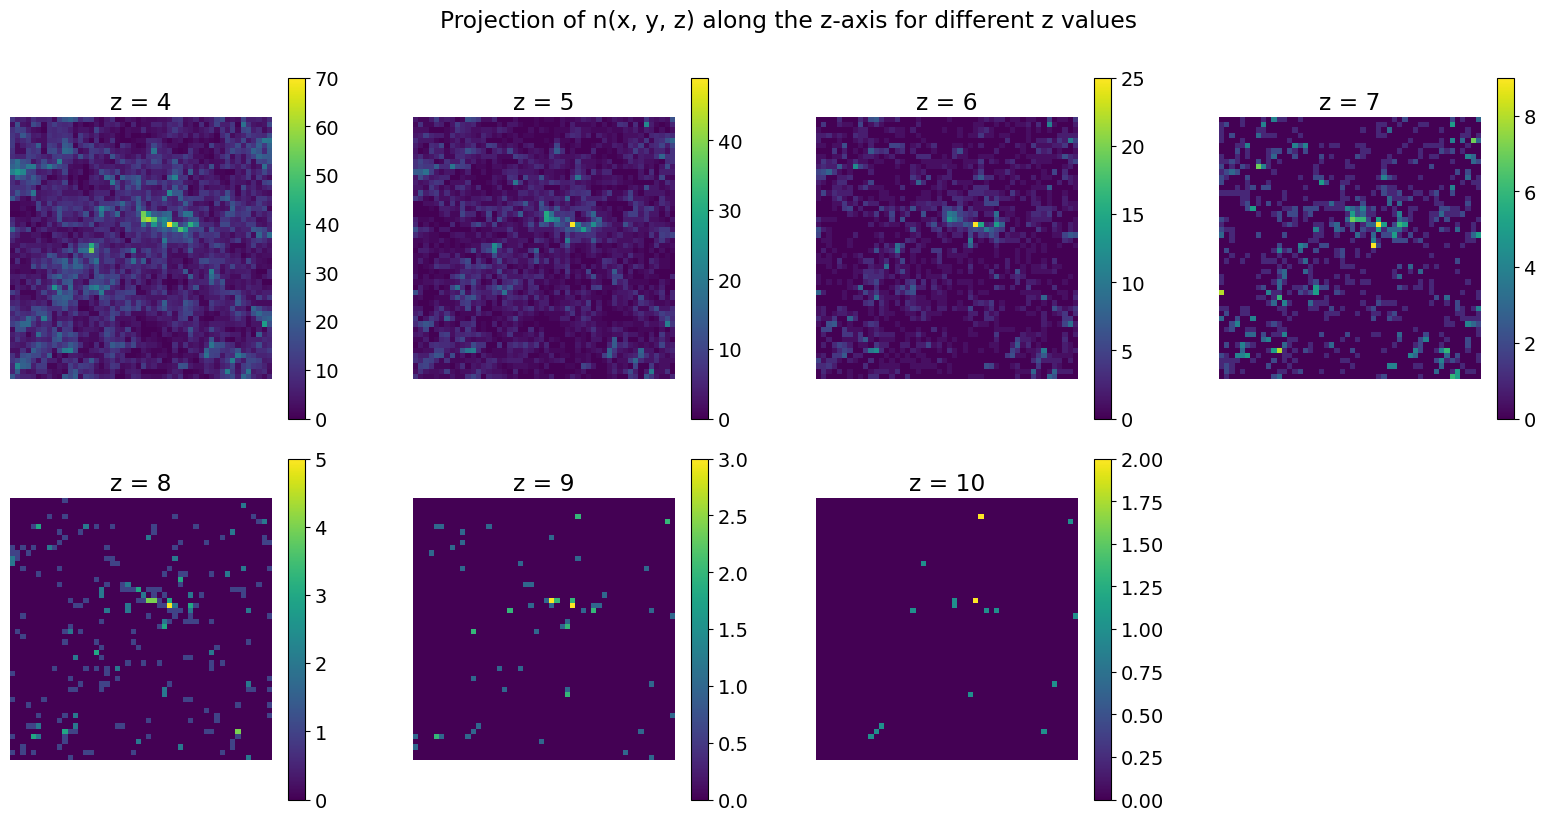

In [12]:
import matplotlib.pyplot as plt     

# Define the number of rows and columns for the subplots
n_rows = 2
n_cols = 4

# Create the figure and subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))

# # Variable to hold the last image object
# im = None

# Iterate through the arrays and create color plots
for i, arr in enumerate(nz_arrays):
    # Project the array along axis 2
    projected_arr = arr
    
    # Determine the row and column index for the subplot
    row_idx = i // n_cols
    col_idx = i % n_cols
    
    # Plot the color plot in the corresponding subplot
    im = axs[row_idx, col_idx].imshow(projected_arr, cmap='viridis')
    axs[row_idx, col_idx].set_title(f'z = {i+4}')
    axs[row_idx, col_idx].axis('off')

    # Create a colorbar for the current subplot
    fig.colorbar(im, ax=axs[row_idx, col_idx])

# Adjust the spacing between subplots
plt.tight_layout()
plt.suptitle('Projection of n(x, y, z) along the z-axis for different z values', y=1.05)

# # Add a colorbar using the last image object
# fig.colorbar(im, ax=axs.ravel().tolist())

axs[1, 3].set_axis_off()

# Show the plot
plt.show()

In [13]:
# nz_array has slices of n(x, y, z) at z ~ 4 to 10
# min_z and max_z has minimum and maximum extend of z axis of each slice
# Now I want to introduce a new axis for z in order to extrapolate the data to z = 4 to 10
# Let's call it the new_z_axis, it need to be in h^-1 Kpc.
# We can easily find the corresponding comoving distance of the redshifts 4 to 10. 

from astropy.cosmology import FlatLambdaCDM

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Define the reduced Hubble constant
h = 0.7

# Define the redshifts
redshifts = [4, 5, 6, 7, 8, 9, 10]

# Calculate the comoving distances
new_z_axis = cosmo.comoving_distance(redshifts).value /h  # Convert to h^-1 Mpc

print(new_z_axis)

# Now we need to interpolate the data from the slices to the new z axis
import numpy as np
from scipy.interpolate import interp1d

f = interp1d(new_z_axis, nz_arrays, axis=0)

[10243.38059209 11107.67213638 11781.31432606 12325.14617603
 12776.00740964 13157.63131888 13486.07089486]


[10243.38059209 10704.6030531  11107.67213638 11463.77185054
 11781.31432606 12066.75699816 12325.14617603 12560.48798223
 12776.00740964 12974.33305049 13157.63131888 13327.70564192
 13486.07089486]


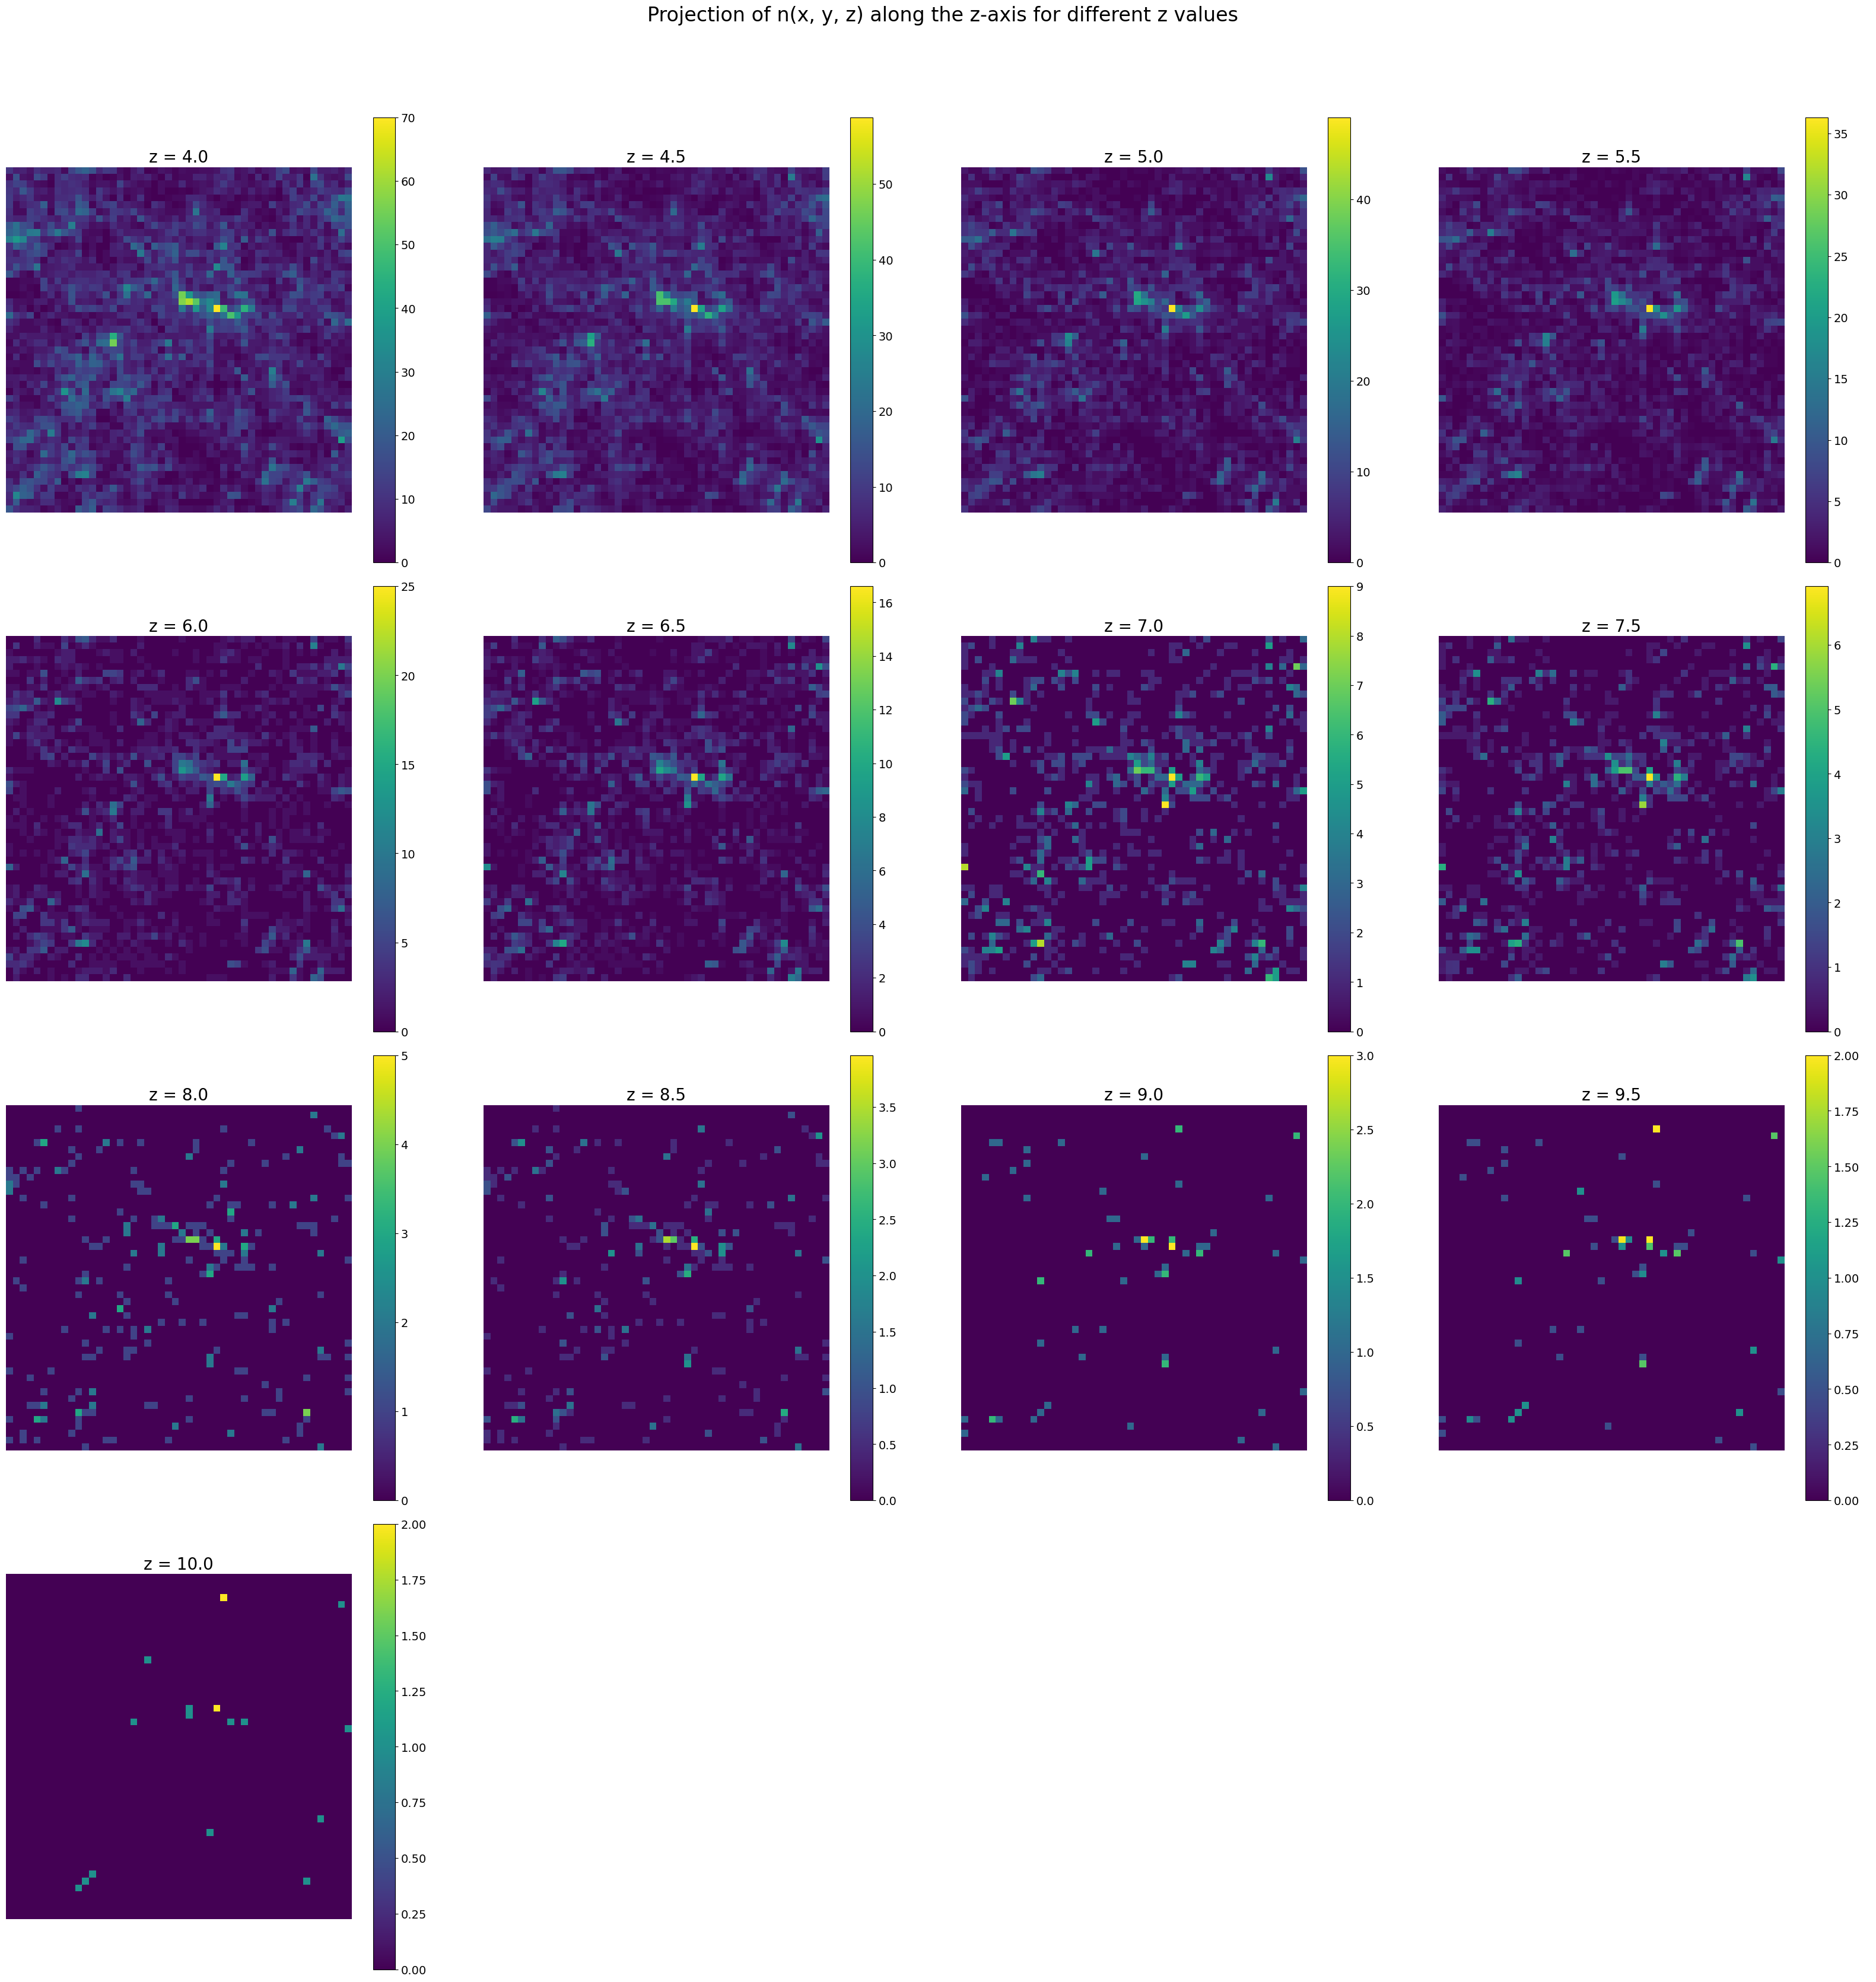

In [14]:
import numpy as np
from astropy.cosmology import FlatLambdaCDM

# Deine the x array
x = np.array([4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])

# Define the cosmology
H0 = 70.0  # Hubble constant in km/s/Mpc
Om0 = 0.3  # Matter density parameter
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

# Convert x array to comoving distance in h^{-1}Mpc
x_comoving = cosmo.comoving_distance(x).value / h

# Print the converted array
print(x_comoving)

# Calculate the corresponding nz array using the function 'f'
nz = f(x_comoving)

# Create a figure with 2 rows and 4 column subplots
fig, axs = plt.subplots(4, 4, figsize=(32, 32))

# Iterate through the arrays and create color plots
for i, arr in enumerate(nz):
    # Project the array along axis 2
    projected_arr = arr
    
    # Determine the row and column index for the subplot
    row_idx = i // n_cols
    col_idx = i % n_cols
    
    # Plot the color plot in the corresponding subplot
    im = axs[row_idx, col_idx].imshow(projected_arr, cmap='viridis')
    axs[row_idx, col_idx].set_title(f'z = {x[i]}', fontsize=20)
    axs[row_idx, col_idx].axis('off')

    # Create a colorbar for the current subplot
    fig.colorbar(im, ax=axs[row_idx, col_idx])

# Adjust the spacing between subplots
plt.tight_layout()
plt.suptitle('Projection of n(x, y, z) along the z-axis for different z values', y=1.05, fontsize=24)

# # Add a colorbar using the last image object
# fig.colorbar(im, ax=axs.ravel().tolist())

axs[3, 1].set_axis_off()
axs[3, 2].set_axis_off()
axs[3, 3].set_axis_off()

# Show the figure
plt.show()

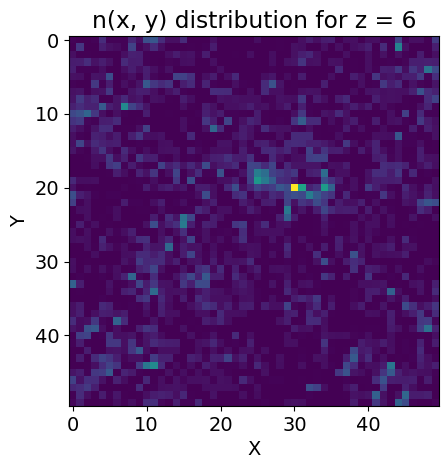

In [15]:
# I need to construct a 100000 h^-1 Mpc box with max_z - min_z = 3524 h^-1 kpc slices.
# I want to creat this box at redshift 6.
# The comoving distance of redshift 6 will be used as the cent_z of the box.
# start_z would be cent_z - 50000 h^-1 kpc and end_z would be cent_z + 50000 h^-1 kpc.
# I will devide this box into slices of 3524 h^-1 kpc each. 
# There will be 100000 / 3524 = 28 slices in total.
# for each slice the n(x,y) distribution will be calculated from fuction f.
# But f will be evaluated not at the center of the box, but at max_z + min_z = 1762 h^-1 kpc to the left of the center.

import numpy as np
from astropy.cosmology import FlatLambdaCDM

# Define the cosmology
H0 = 70.0  # Hubble constant in km/s/Mpc
Om0 = 0.3  # Matter density parameter
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

# Define the cent_z of the box
cent_z = 6
# In comoving coordinates
cent_z_comoving = cosmo.comoving_distance(cent_z).value / h

# Define the start_z_comoving and end_z_comoving
start_z_comoving = cent_z_comoving - 50 # I am working on h^-1 Mpc unit
end_z_comoving = cent_z_comoving + 50

# Define the number of slices
num_slices = 28

# Define the slice size
slice_size = 3.524 # h^-1 Mpc

# Define the z coordinates of the slices
slice_z_coords = np.linspace(start_z_comoving, end_z_comoving, num_slices + 1)

# Define the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# Calculate the coordinate max_z + min_z = 1762 h^-1 kpc to the left of the center
slice_coords = slice_centers - 1.762

# Calculate the nz arrays for each slice
nz_slices = f(slice_coords)

# Now making an animation of the slices.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create or load your array of 2D arrays
# For demonstration, let's create a random array of shape (num_frames, height, width)
num_frames = len(nz_slices)

# Create the initial plot
fig, ax = plt.subplots()
im = ax.imshow(nz_slices[0], cmap='viridis')  # Display the first 2D array

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('n(x, y) distribution for z = 6')

# Update function for animation
def update(frame):
    im.set_array(nz_slices[frame])  # Update the data for each frame
    return im,

# Create animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=20)  # Interval in milliseconds

# Save the animation in gif format the data folder
DATA_DIRECTORY = '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Plots/temp/Overleaf_MBII/'
ani.save(DATA_DIRECTORY + 'n_slices_animation.gif', writer='imagemagick')

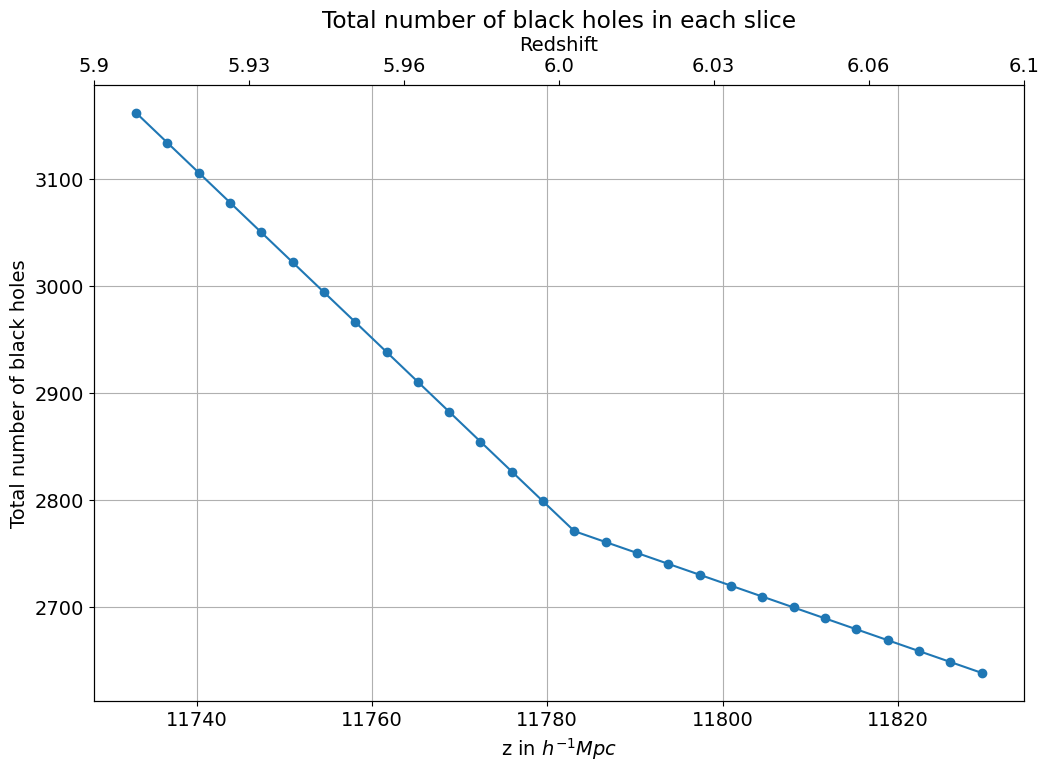

xticks: [11720. 11740. 11760. 11780. 11800. 11820. 11840.]
xticklabels: ['11720', '11740', '11760', '11780', '11800', '11820', '11840']


In [16]:
# I have the nz_slices array which contains the n(x, y) distribution for each slice from the previous cell.
# Now I want to sum the total number of black holes in each slice and plot it as a function of z.

# Calculate the total number of black holes in each slice
total_n = np.sum(np.sum(nz_slices, axis=1), axis=1)

from astropy.cosmology import FlatLambdaCDM, z_at_value
from astropy import units as u

# Define your cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Convert comoving distances to redshifts
redshifts = [z_at_value(cosmo.comoving_distance, dist * u.Mpc) for dist in slice_centers]

# Create a plot of total_n vs. z
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.plot(slice_centers, total_n, marker='o', linestyle='-')
ax1.set_xlabel(r'z in $h^{-1} Mpc$')
ax1.set_ylabel('Total number of black holes')
ax1.set_title('Total number of black holes in each slice')
ax1.grid(True)

# Add also another axis on top to show the redshifts corresponding to the xticks in the bottom axis
ax2 = ax1.twiny()
ax2.set_xlabel('Redshift')

# Get the limits of the ax1 axis
ax1_xlims = ax1.get_xlim()

# Set the limits of the ax2 axis to be the same as the ax1 axis
ax2.set_xlim(ax1_xlims)

# Extract the current xtick labels
xticks = ax1.get_xticks()
# Convert the xticks to redshifts just in numbers
redshifts = [np.round(z_at_value(cosmo.comoving_distance, dist * h * u.Mpc).value,2) for dist in xticks]
# Set the xticks and labels for the top axis
ax2.set_xticks(xticks)
ax2.set_xticklabels(redshifts)

xticklabels = [label.get_text() for label in ax1.get_xticklabels()]

plt.show()

# Print the xticks and xticklabels
print("xticks:", xticks)
print("xticklabels:", xticklabels)

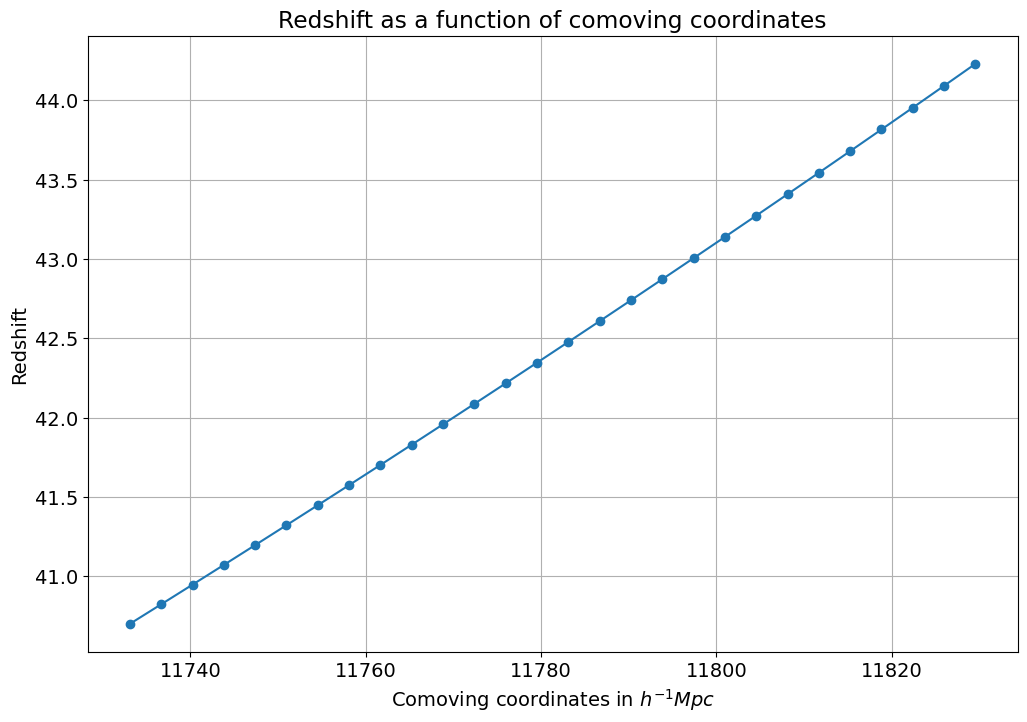

In [66]:
# I have slice_centers from the previous cells which contains the center of each slice in comoving coordinates.
# I want to convert these comoving coordinates to redshifts and plot them as a function of the comoving coordinates.

from astropy.cosmology import FlatLambdaCDM, z_at_value
from astropy import units as u

# Define your cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Convert comoving distances to redshifts
redshifts = [z_at_value(cosmo.comoving_distance, dist * u.Mpc) for dist in slice_centers]

# Create a plot of redshifts vs. comoving coordinates
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(slice_centers, redshifts, marker='o', linestyle='-')
ax.set_xlabel(r'Comoving coordinates in $h^{-1} Mpc$')
ax.set_ylabel('Redshift')
ax.set_title('Redshift as a function of comoving coordinates')
ax.grid(True)

plt.show()


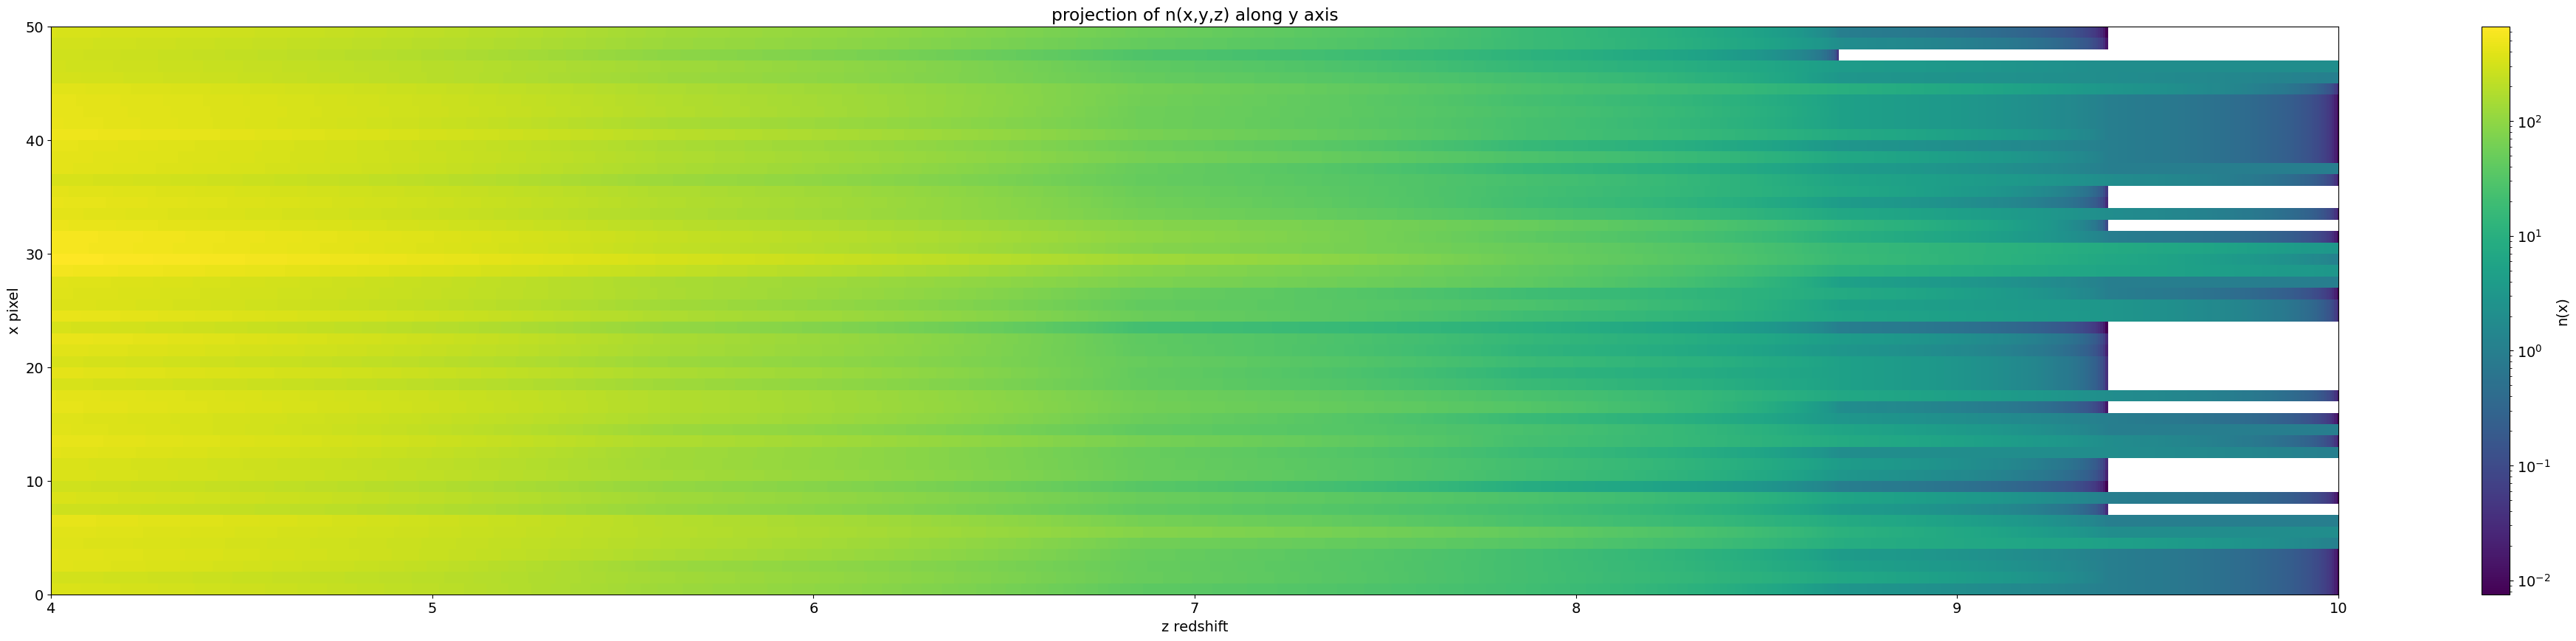

In [43]:
# I want to define the slice size as max_z - min_z = 3.524 h^-1 Mpc.
# I want to convert the whole z axis from z = 4 to 10 to comoving coordinates.
# I want to divide this z axis into slices of 3.524 h^-1 Mpc each.
# I want to calculate the n(x, y) distribution for each slice.

import numpy as np
from astropy.cosmology import FlatLambdaCDM

# Define the cosmology
H0 = 70.0  # Hubble constant in km/s/Mpc
Om0 = 0.3  # Matter density parameter
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)
h = 0.7 # Reduced Hubble constant

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value / h
end_comoving = cosmo.comoving_distance(end_z).value / h

# Define the slice size
slice_size = 3.524  # h^-1 Mpc

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# Calculate the coordinate max_z + min_z = 1762 h^-1 kpc to the left of the center
slice_coords = slice_centers - 1.762

# Calculate the nz arrays for each slice
nz_slices = f(slice_coords)

# Now I want to sum over the y axis and plot n(x) for each slice as a function of slice center.
x_projection = np.sum(nz_slices, axis=2)

# Create a colorplot of the x_projection
fig, ax = plt.subplots(figsize=(50, 10))
im = ax.imshow(x_projection.T, cmap='viridis', extent=[start_z, end_z, 0, 50], aspect='auto', norm=matplotlib.colors.LogNorm())
ax.set_xlabel('z redshift')
ax.set_ylabel('x pixel')
ax.set_title('projection of n(x,y,z) along y axis')
plt.colorbar(im, label='n(x)')
plt.show()


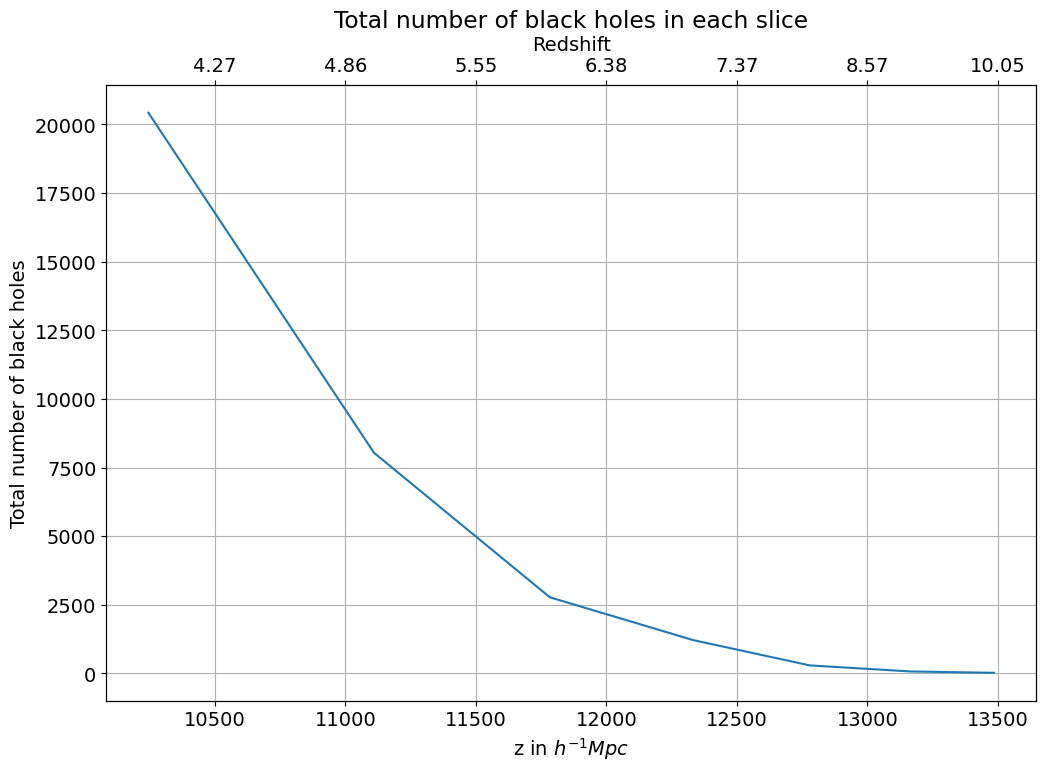

In [61]:
# Calculate the total number of black holes in each slice and plot it as a function of the slice center
total_n = np.sum(np.sum(nz_slices, axis=1), axis=1)

# Create a plot of total_n vs. slice center
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.plot(slice_centers, total_n, linestyle='-')
ax1.set_xlabel(r'z in $h^{-1} Mpc$')
ax1.set_ylabel('Total number of black holes')
ax1.set_title('Total number of black holes in each slice')
ax1.grid(True)

# Add also another axis on top to show the redshifts corresponding to the xticks in the bottom axis
ax2 = ax1.twiny()
ax2.set_xlabel('Redshift')

# Get the limits of the ax1 axis
ax1_xlims = ax1.get_xlim()

# Set the limits of the ax2 axis to be the same as the ax1 axis
ax2.set_xlim(ax1_xlims)

# Extract the current xtick labels
xticks = ax1.get_xticks()
# Convert the xticks to redshifts just in numbers
redshifts = [np.round(z_at_value(cosmo.comoving_distance, dist * h * u.Mpc).value,2) for dist in xticks]
# Set the xticks and labels for the top axis
ax2.set_xticks(xticks[1:-1])
ax2.set_xticklabels(redshifts[1:-1])

xticklabels = [label.get_text() for label in ax1.get_xticklabels()]

# Can you

plt.show()


In [89]:
# Similar to slice_centers, I want to find the center of the pixels in the x and y directions.

# Define the number of pixels in each dimension
num_pixels_x = 50
num_pixels_y = 50
num_pixels_z = 2

# Calculate the pixel size in each dimension
x_range = (0, 100000) #(np.min(x_coordinates), np.max(x_coordinates))
y_range = (0, 100000) #(np.min(y_coordinates), np.max(y_coordinates))
z_range = (-1444, 2080) #(np.min(z_coordinates), np.max(z_coordinates))

# Calculate the pixel size in each dimension
pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y

# Calculate the pixel centers in the x and y directions
pixel_centers_x = np.linspace(x_range[0] + pixel_size / 2, x_range[1] - pixel_size / 2, num_pixels_x)
pixel_centers_y = np.linspace(y_range[0] + pixel_size / 2, y_range[1] - pixel_size / 2, num_pixels_y)

# Define the pixel center in the z direction
pixel_centers_z = slice_centers

# Now we have nz_slices as a 3d array which contains the n(x, y, z) which is the number of black holes in each pixel.
# given the number of black holes in each pixel, I want to randomly distribute black holes in each pixel according to the number of black holes in that pixel.
# I want to create an array that contains the x, y, z coordinates of each black hole that we have distributed.

# Define the number of black holes in each pixel
n_bh = nz_slices

# Initialize an empty list to store the black hole coordinates
bh_coordinates = []

# Iterate over the pixels and distribute the black holes
for k in range(num_slices):
    for i in range(num_pixels_x):
        for j in range(num_pixels_y):
            # Get the number of black holes in the current pixel
            n = round(n_bh[k, i, j])
            
            # Generate random x, y, z coordinates for the black holes in the pixel
            x_coords = np.random.uniform(low=pixel_centers_x[i] - pixel_size / 2, high=pixel_centers_x[i] + pixel_size / 2, size=n)
            y_coords = np.random.uniform(low=pixel_centers_y[j] - pixel_size / 2, high=pixel_centers_y[j] + pixel_size / 2, size=n)
            z_coords = np.random.uniform(low=pixel_centers_z[k] - slice_size / 2, high=pixel_centers_z[k] + slice_size / 2, size=n)
            
            # Append the coordinates to the list
            bh_coordinates.extend(list(zip(x_coords, y_coords, z_coords)))

# Convert the list of coordinates to a numpy array
bh_coordinates = np.array(bh_coordinates)

# Print the first few rows of the black hole coordinates
print(bh_coordinates[:5])



[[ 1759.04502891  1217.17358048 10245.1956533 ]
 [ 1796.15557964   602.22264269 10245.00182363]
 [  480.12286127   618.32485297 10246.48126059]
 [  952.96807158  1121.19728079 10243.75113633]
 [ 1577.63903996   608.40138643 10245.71932676]]


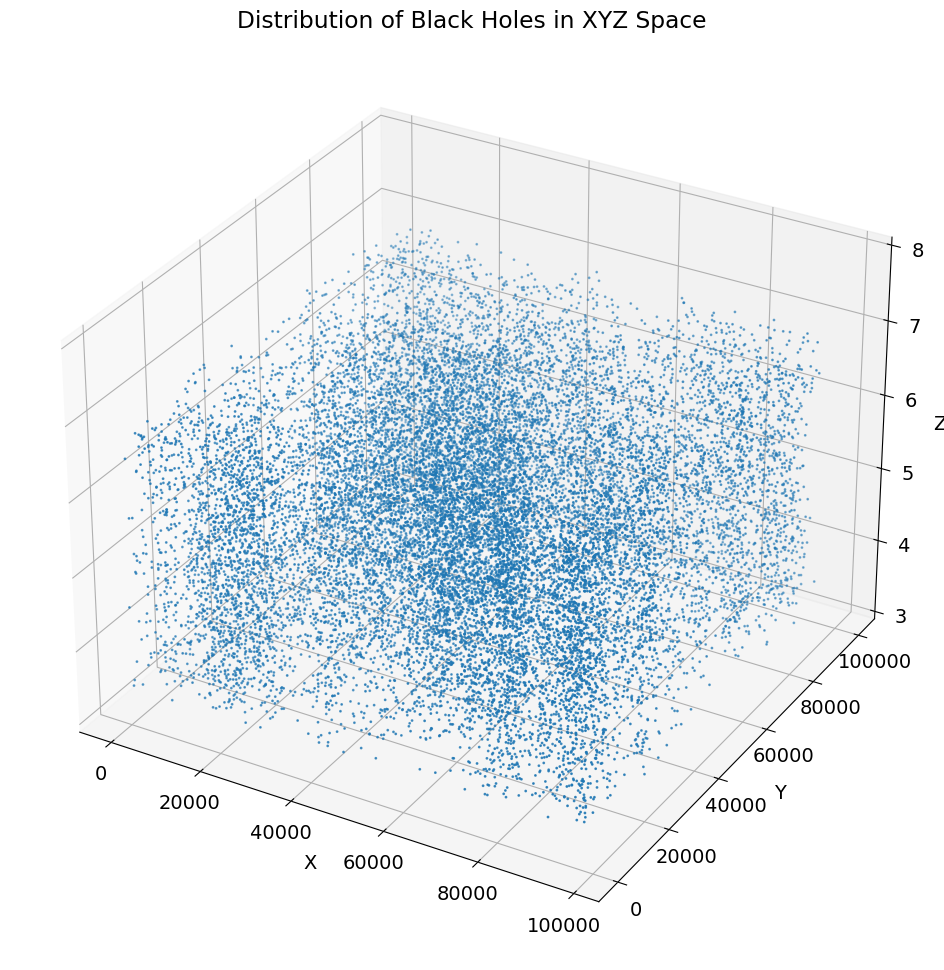

In [103]:

# I have the bh_coordinates array which contains the x, y, z coordinates of the black holes.   
# Now I want to create a 3D scatter plot of the subset of black hole distribution in z.

# Define the number of black holes to show in the plot
num_black_holes = 20000

# Get the z coordinates of the black holes
z_coords = bh_coordinates[:num_black_holes, 2]

# Get the x and y coordinates of the black holes
x_coords = bh_coordinates[:num_black_holes, 0]
y_coords = bh_coordinates[:num_black_holes, 1]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 12)) # Increase figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, s=1)  # Decrease marker size

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Distribution of Black Holes in XYZ Space')

# Set z-axis limits
ax.set_zlim(10243, 10248)  # Adjust the z-axis limits according to your desired range

# Show the plot
plt.show()



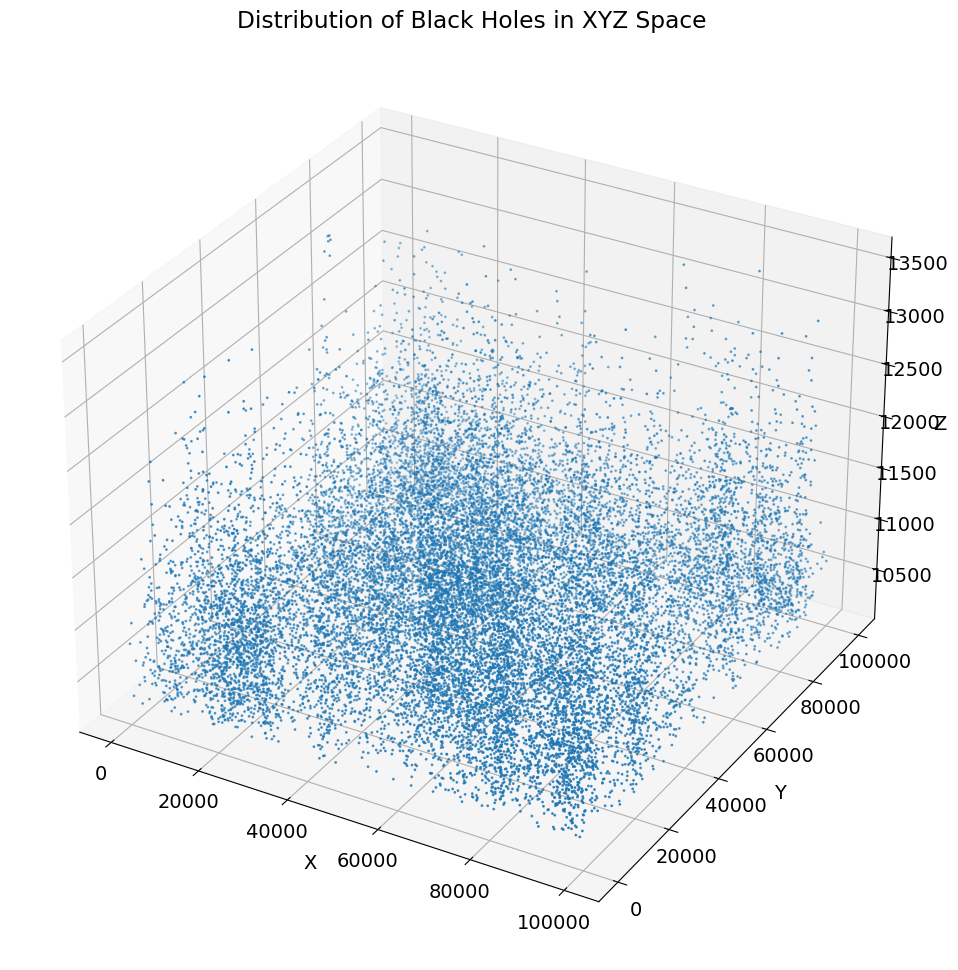

In [104]:
# Let's randomly select a subset of the black holes and plot the distribution in the x-y-z space.

# Define the number of black holes to show in the plot
num_black_holes = 20000

# randomly draw num_black_holes from the bh_coordinates
random_indices = np.random.choice(bh_coordinates.shape[0], num_black_holes, replace=False)
random_bh_coordinates = bh_coordinates[random_indices]

# Get the z coordinates of the black holes
z_coords = random_bh_coordinates[:, 2]

# Get the x and y coordinates of the black holes
x_coords = random_bh_coordinates[:, 0]
y_coords = random_bh_coordinates[:, 1]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 12)) # Increase figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, s=1)  # Decrease marker size

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Distribution of Black Holes in XYZ Space')


# Show the plot
plt.show()


## Observing the incompleteness effect

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Corrfunc.theory.DD import DD
from sklearn.neighbors import KernelDensity
from scipy.stats import norm
import scipy.optimize as spo

DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

def pow_func(r, A, alpha):
    return A * np.power(r, -alpha)

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 14}

import matplotlib
matplotlib.rc('font', **font)

# Getting the x, y, z coordinates of the black holes and the number of black holes in each pixel

file_paths = ['/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_024.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_020.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_019.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_018.txt']

n_arrays = []

for file_path in file_paths:
    # Load the data from the file
    data = np.loadtxt(file_path)
    
    # Extract the x, y, and z coordinates
    x_coordinates = data[:, 2]
    y_coordinates = data[:, 3]
    z_coordinates = data[:, 4]
    
    # Define the number of pixels in each dimension
    num_pixels_x = 50
    num_pixels_y = 50
    num_pixels_z = 2
    
    # Calculate the pixel size in each dimension
    x_range = (0, 100000) #(np.min(x_coordinates), np.max(x_coordinates))
    y_range = (0, 100000) #(np.min(y_coordinates), np.max(y_coordinates))
    z_range = (-1444, 2080) #(np.min(z_coordinates), np.max(z_coordinates))
    
    pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
    pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y
    pixel_size_z = (z_range[1] - z_range[0]) / num_pixels_z
    
    # Calculate the pixel indices for each coordinate
    pixel_indices_x = ((x_coordinates - x_range[0]) / pixel_size_x).astype(int)
    pixel_indices_y = ((y_coordinates - y_range[0]) / pixel_size_y).astype(int)
    pixel_indices_z = ((z_coordinates - z_range[0]) / pixel_size_z).astype(int)
    
    # Create an empty n(x, y, z) array
    n_array = np.zeros((num_pixels_x, num_pixels_y, num_pixels_z))
    
    # Count the number of particles in each pixel
    for i in range(len(x_coordinates)):
        n_array[pixel_indices_x[i], pixel_indices_y[i], pixel_indices_z[i]] += 1
    
    n_arrays.append(n_array)

# Create a list to store the new arrays
nz_arrays = []

# Iterate over each array in n_arrays
for arr in n_arrays:
    # Take the sum along axis 3
    sum_arr = np.sum(arr, axis=2)
    # Append the sum array to the list
    nz_arrays.append(sum_arr)

# nz_array has slices of n(x, y, z) at z ~ 4 to 10
# min_z and max_z has minimum and maximum extend of z axis of each slice
# Now I want to introduce a new axis for z in order to extrapolate the data to z = 4 to 10
# Let's call it the new_z_axis, it need to be in h^-1 Kpc.
# We can easily find the corresponding comoving distance of the redshifts 4 to 10. 

from astropy.cosmology import FlatLambdaCDM

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Define the reduced Hubble constant
h = 0.7

# Define the redshifts
redshifts = [4, 5, 6, 7, 8, 9, 10]

# Calculate the comoving distances
new_z_axis = cosmo.comoving_distance(redshifts).value /h  # Convert to h^-1 Mpc

print(new_z_axis)

# Now we need to interpolate the data from the slices to the new z axis
import numpy as np
from scipy.interpolate import interp1d

f = interp1d(new_z_axis, nz_arrays, axis=0)

# I want to define the slice size as max_z - min_z = 3.524 h^-1 Mpc.
# I want to convert the whole z axis from z = 4 to 10 to comoving coordinates.
# I want to divide this z axis into slices of 3.524 h^-1 Mpc each.
# I want to calculate the n(x, y) distribution for each slice.

import numpy as np
from astropy.cosmology import FlatLambdaCDM

# Define the cosmology
H0 = 70.0  # Hubble constant in km/s/Mpc
Om0 = 0.3  # Matter density parameter
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)
h = 0.7 # Reduced Hubble constant

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value / h # h^-1 Mpc
end_comoving = cosmo.comoving_distance(end_z).value / h

# Define the slice size
slice_size = 3.524  # h^-1 Mpc

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# Calculate the coordinate max_z + min_z = 1762 h^-1 kpc to the left of the center
slice_coords = slice_centers - 1.762

# Calculate the nz arrays for each slice
nz_slices = f(slice_coords)

# Similar to slice_centers, I want to find the center of the pixels in the x and y directions.

# Define the number of pixels in each dimension
num_pixels_x = 50
num_pixels_y = 50
num_pixels_z = 2

# Calculate the pixel size in each dimension
x_range = (0, 100) #(np.min(x_coordinates), np.max(x_coordinates)) h^-1 Mpc
y_range = (0, 100) #(np.min(y_coordinates), np.max(y_coordinates))

# Calculate the pixel size in each dimension
pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y

# Calculate the pixel centers in the x and y directions
pixel_centers_x = np.linspace(x_range[0] + pixel_size_x / 2, x_range[1] - pixel_size_x / 2, num_pixels_x)
pixel_centers_y = np.linspace(y_range[0] + pixel_size_y / 2, y_range[1] - pixel_size_y / 2, num_pixels_y)

# Define the pixel center in the z direction
pixel_centers_z = slice_centers

# Now we have nz_slices as a 3d array which contains the n(x, y, z) which is the number of black holes in each pixel.
# given the number of black holes in each pixel, I want to randomly distribute black holes in each pixel according to the number of black holes in that pixel.
# I want to create an array that contains the x, y, z coordinates of each black hole that we have distributed.

# Define the number of black holes in each pixel
n_bh = nz_slices

# Initialize an empty list to store the black hole coordinates
bh_coordinates = []

# Iterate over the pixels and distribute the black holes
for k in range(num_slices):
    for i in range(num_pixels_x):
        for j in range(num_pixels_y):
            # Get the number of black holes in the current pixel
            n = round(n_bh[k, i, j])
            
            # Generate random x, y, z coordinates for the black holes in the pixel
            x_coords = np.random.uniform(low=pixel_centers_x[i] - pixel_size_x / 2, high=pixel_centers_x[i] + pixel_size_x / 2, size=n)
            y_coords = np.random.uniform(low=pixel_centers_y[j] - pixel_size_y / 2, high=pixel_centers_y[j] + pixel_size_y / 2, size=n)
            z_coords = np.random.uniform(low=pixel_centers_z[k] - slice_size / 2, high=pixel_centers_z[k] + slice_size / 2, size=n)
            
            # Append the coordinates to the list
            bh_coordinates.extend(list(zip(x_coords, y_coords, z_coords)))

# Convert the list of coordinates to a numpy array
bh_coordinates = np.array(bh_coordinates)

# Print the first few rows of the black hole coordinates
print(bh_coordinates[:5])

[10243.38059209 11107.67213638 11781.31432606 12325.14617603
 12776.00740964 13157.63131888 13486.07089486]
[[1.11720909e+00 1.72090125e-01 1.02443820e+04]
 [1.34987144e+00 1.12467447e+00 1.02451699e+04]
 [1.35801446e+00 3.33693282e-02 1.02459886e+04]
 [1.00518145e+00 1.05520079e+00 1.02439267e+04]
 [1.38487003e+00 8.40457766e-01 1.02451514e+04]]


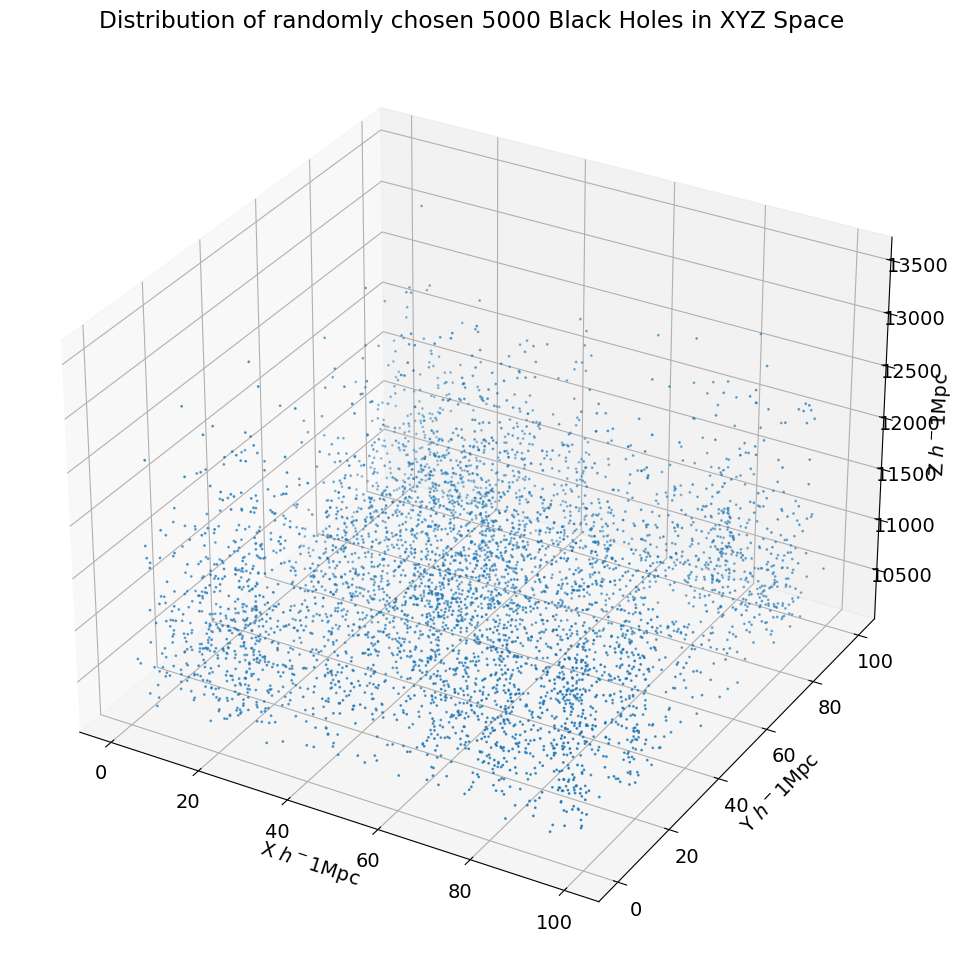

In [4]:
# Let's randomly select a subset of the black holes and plot the distribution in the x-y-z space.

# Define the number of black holes to show in the plot
num_black_holes = 5000

# randomly draw num_black_holes from the bh_coordinates
random_indices = np.random.choice(bh_coordinates.shape[0], num_black_holes, replace=False)
random_bh_coordinates = bh_coordinates[random_indices]

# Get the z coordinates of the black holes
z_coords = random_bh_coordinates[:, 2]

# Get the x and y coordinates of the black holes
x_coords = random_bh_coordinates[:, 0]
y_coords = random_bh_coordinates[:, 1]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 12)) # Increase figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, s=1)  # Decrease marker size

# Set labels and title
ax.set_xlabel(r'X $h^-1$Mpc')
ax.set_ylabel(r'Y $h^-1$Mpc')
ax.set_zlabel(r'Z $h^-1$Mpc')
ax.set_title('Distribution of randomly chosen {} Black Holes in XYZ Space'.format(num_black_holes))


# Show the plot
plt.show()

In [5]:
# Consider the box in which the black holes are distributed, the lengths of the box spanned minimum and maximum x, y, z coordinates of the black holes.

# Define the minimum and maximum x, y, z coordinates of the black holes
min_x = np.min(bh_coordinates[:, 0])
max_x = np.max(bh_coordinates[:, 0])
min_y = np.min(bh_coordinates[:, 1])
max_y = np.max(bh_coordinates[:, 1])
min_z = np.min(bh_coordinates[:, 2])
max_z = np.max(bh_coordinates[:, 2])

# Calculate the volume of the box
volume = (max_x - min_x) * (max_y - min_y) * (max_z - min_z)

# Now calculate the total number of black holes in the box
total_bh = bh_coordinates.shape[0]

# Calculate the number density of black holes
number_density = total_bh / volume

# Print the volume and number density
print("Volume of the box: {:.2f} h^-1 Mpc^3".format(volume))
print("Total number of black holes: {}".format(total_bh))
print("Number density of black holes: {:.2e} h^3 Mpc^-3".format(number_density))

Volume of the box: 32426227.92 h^-1 Mpc^3
Total number of black holes: 4959383
Number density of black holes: 1.53e-01 h^3 Mpc^-3


In [6]:
# Let's do the same thing we did in previous cell but for the subset of black holes that is the random_bh_coordinates.

# Consider the box in which the black holes are distributed, the lengths of the box spanned minimum and maximum x, y, z coordinates of the black holes.

# Define the minimum and maximum x, y, z coordinates of the subset of black holes
min_x = np.min(random_bh_coordinates[:, 0])
max_x = np.max(random_bh_coordinates[:, 0])
min_y = np.min(random_bh_coordinates[:, 1])
max_y = np.max(random_bh_coordinates[:, 1])
min_z = np.min(random_bh_coordinates[:, 2])
max_z = np.max(random_bh_coordinates[:, 2])

# Calculate the volume of the box
volume = (max_x - min_x) * (max_y - min_y) * (max_z - min_z)

# Now calculate the total number of black holes in the box
total_bh = random_bh_coordinates.shape[0]

# Calculate the number density of black holes
number_density = total_bh / volume

# Print the volume and number density
print("Volume of the box: {:.2f} h^-1 Mpc^3".format(volume))
print("Total number of black holes: {}".format(total_bh))
print("Number density of black holes: {:.2e} h^3 Mpc^-3".format(number_density))

Volume of the box: 32338669.35 h^-1 Mpc^3
Total number of black holes: 5000
Number density of black holes: 1.55e-04 h^3 Mpc^-3


In [45]:
# Now i have bh_coordinates array as an array containing the position of many black holes from the light cone constructed.
# I can choose a subset of black holes from this array and use it to find the correlation function.
# Let me take the subset we have choosen in the previous cell and calculate the correlation function.

# Let's randomly select a subset of the black holes and plot the distribution in the x-y-z space.

# Define the number of black holes to show in the plot
num_black_holes = 30000

# randomly draw num_black_holes from the bh_coordinates
random_indices = np.random.choice(bh_coordinates.shape[0], num_black_holes, replace=False)
random_bh_coordinates = bh_coordinates[random_indices]

# Get the z coordinates of the black holes
z_coords = random_bh_coordinates[:, 2]

# Get the x and y coordinates of the black holes
x_coords = random_bh_coordinates[:, 0]
y_coords = random_bh_coordinates[:, 1]

# Define the subset of black holes to use for the correlation function
bh_pos_x = x_coords
bh_pos_y = y_coords
bh_pos_z = z_coords

min_x = 0
max_x = 100 # h^-1 Mpc. Here x_coords, y_coords, z_coords are in h^-1 Mpc unlike the black holes coordinates directly from the MBII data.
min_y = 0
max_y = 100

mult = 10 ## Number of random points used as a multiple of number of data points
z_bin_size = 0.005   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [0.5]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.arange(0.01, 100, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))

from pandas import DataFrame

df = DataFrame({"r min":bins[0:-1], "r max":bins[1:], "DD count":DD_count, "DR count":DR_count, "RR count": RR_count, "Landy Szalay":LandSzal2pcf, "Pois Error":pois_err})

#Save the data to a file
df.to_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc3k.csv', index=False)

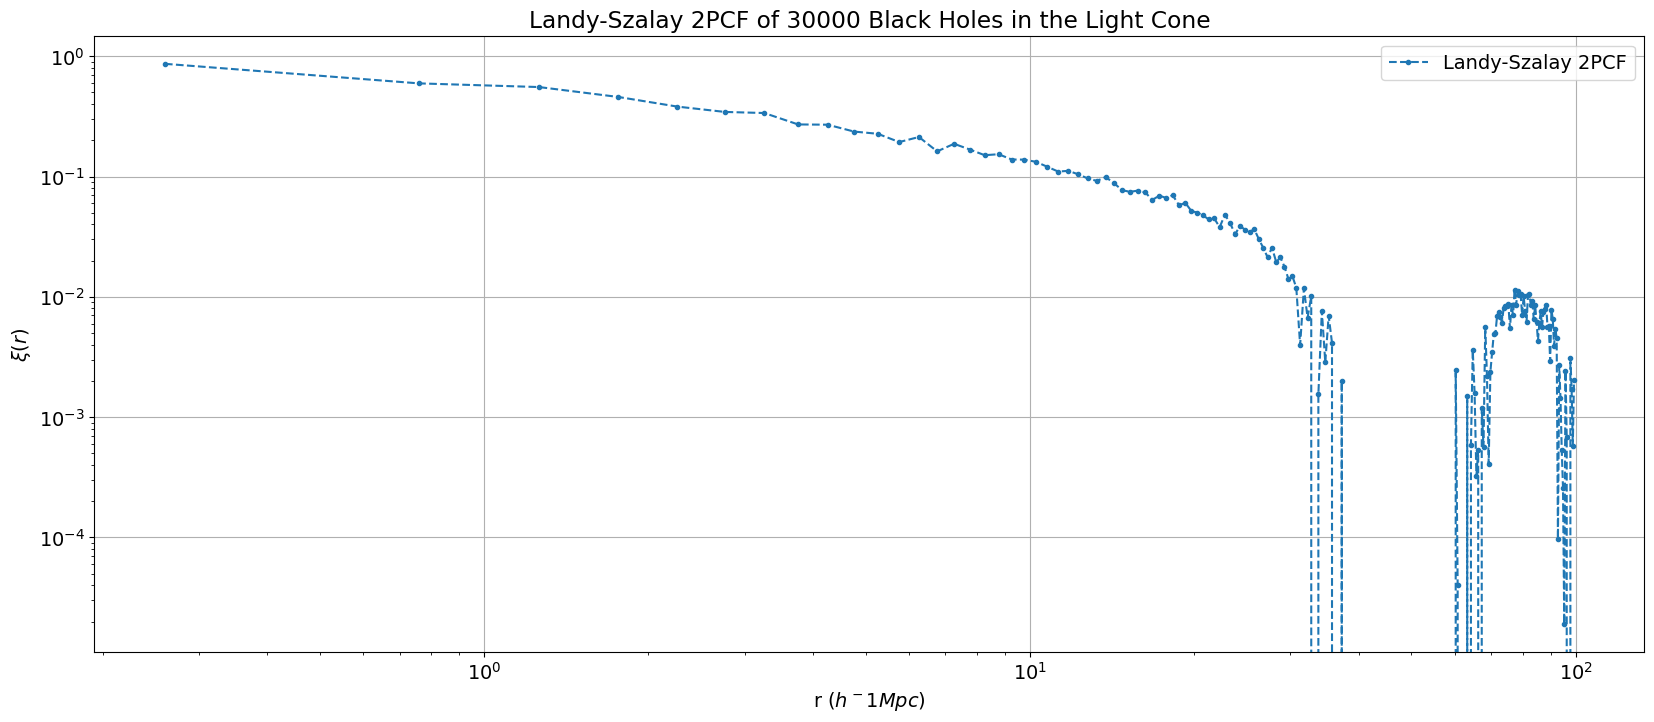

In [46]:
# Let's extract the correlation function data from the file and plot it.

import pandas as pd
import matplotlib.pyplot as plt

# Load the correlation function data from the file
df = pd.read_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc3k.csv')

# Find the midpoint of the radial bins
df['r mid'] = (df['r min'] + df['r max']) / 2

# Number of black holes in the subset
num_black_holes = len(bh_pos_x)

# Plot the correlation function
plt.figure(figsize=(20, 8))
# plt.errorbar(df['r mid'], df['Landy Szalay'], yerr=df['Pois Error'], fmt='o-', label='Landy-Szalay 2PCF')
plt.plot(df['r mid'], df['Landy Szalay'], '.--', label='Landy-Szalay 2PCF')
plt.xlabel(r'r ($h^-1 Mpc$)')
plt.ylabel(r'$\xi(r)$')
plt.title('Landy-Szalay 2PCF of {} Black Holes in the Light Cone'.format(num_black_holes))
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
# setting the range of x-axis
# plt.xlim(10, 100)

plt.show()



In [54]:
# I wanna find where does the correlation function show a drops to negative values and find the corresponding r value.

# Find the index where the correlation function which is df['Landy Szalay'] drops to negative values
neg_idx = np.where(df['Landy Szalay'] < 0)[0][0]

# Find the corresponding r value
r_neg = df['r mid'].iloc[neg_idx]

# Print the r value where the correlation function drops to negative values
print("The correlation function drops to negative values at r = {:.2f} h^-1 Mpc".format(r_neg))


The correlation function drops to negative values at r = 33.26 h^-1 Mpc


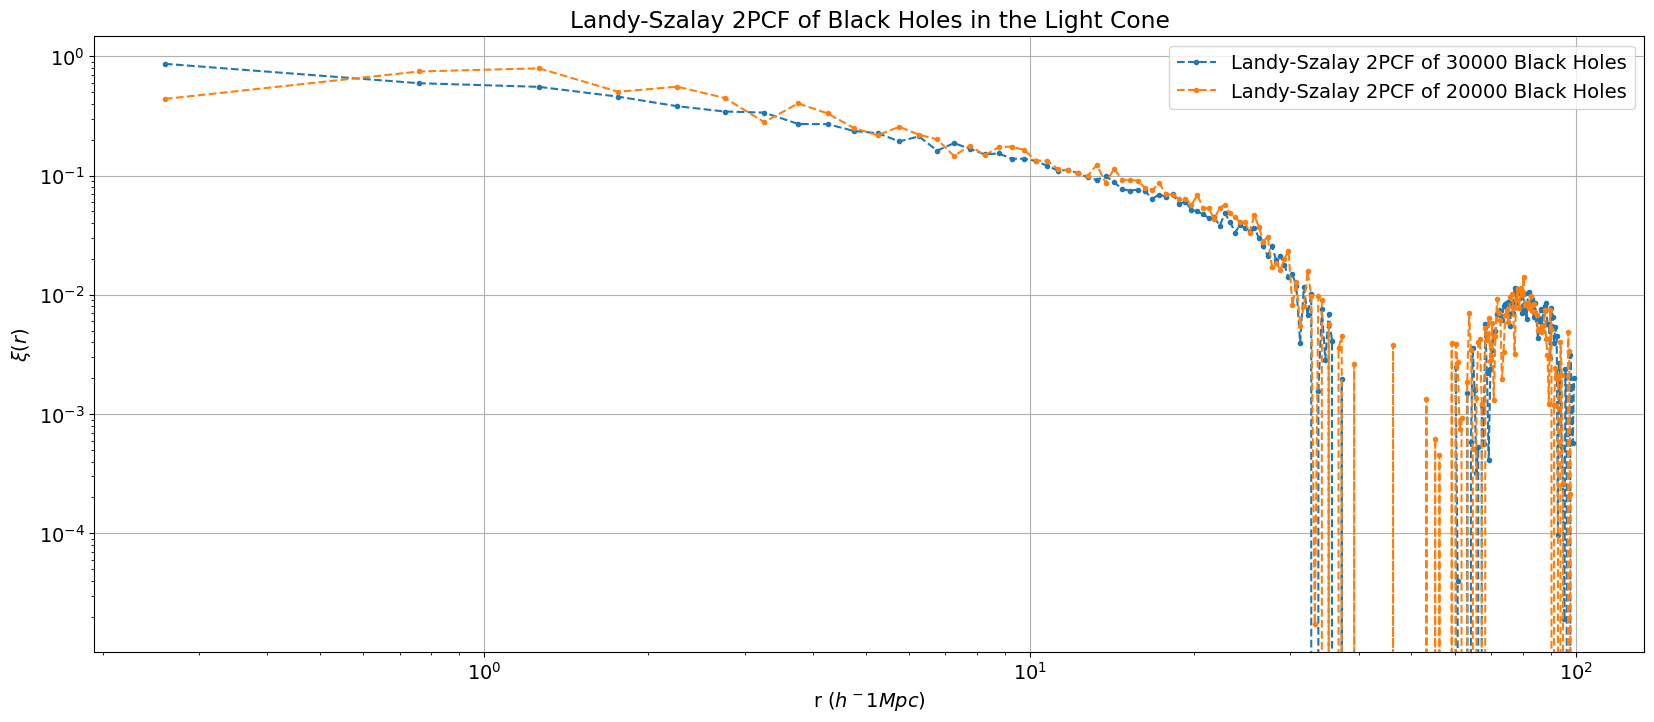

In [47]:
# Let's extract the correation function data from both MBIILightConeCorrfunc3k.csv and MBIILightConeCorrfunc.csv and plot them together.

import pandas as pd
import matplotlib.pyplot as plt

# Load the correlation function data from the file
df = pd.read_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc3k.csv')
df1 = pd.read_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc.csv')

# Find the midpoint of the radial bins
df['r mid'] = (df['r min'] + df['r max']) / 2
df1['r mid'] = (df1['r min'] + df1['r max']) / 2

# Number of black holes in the subset
num_black_holes3k = 30000
num_black_holes = 20000

# Plot the correlation function
plt.figure(figsize=(20, 8))
# plt.errorbar(df['r mid'], df['Landy Szalay'], yerr=df['Pois Error'], fmt='o-', label='Landy-Szalay 2PCF')
plt.plot(df['r mid'], df['Landy Szalay'], '.--', label='Landy-Szalay 2PCF of {} Black Holes'.format(num_black_holes3k))
plt.plot(df1['r mid'], df1['Landy Szalay'], '.--', label='Landy-Szalay 2PCF of {} Black Holes'.format(num_black_holes))
plt.xlabel(r'r ($h^-1 Mpc$)')
plt.ylabel(r'$\xi(r)$')
plt.title('Landy-Szalay 2PCF of Black Holes in the Light Cone')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
# setting the range of x-axis
# plt.xlim(10, 100)

plt.show()

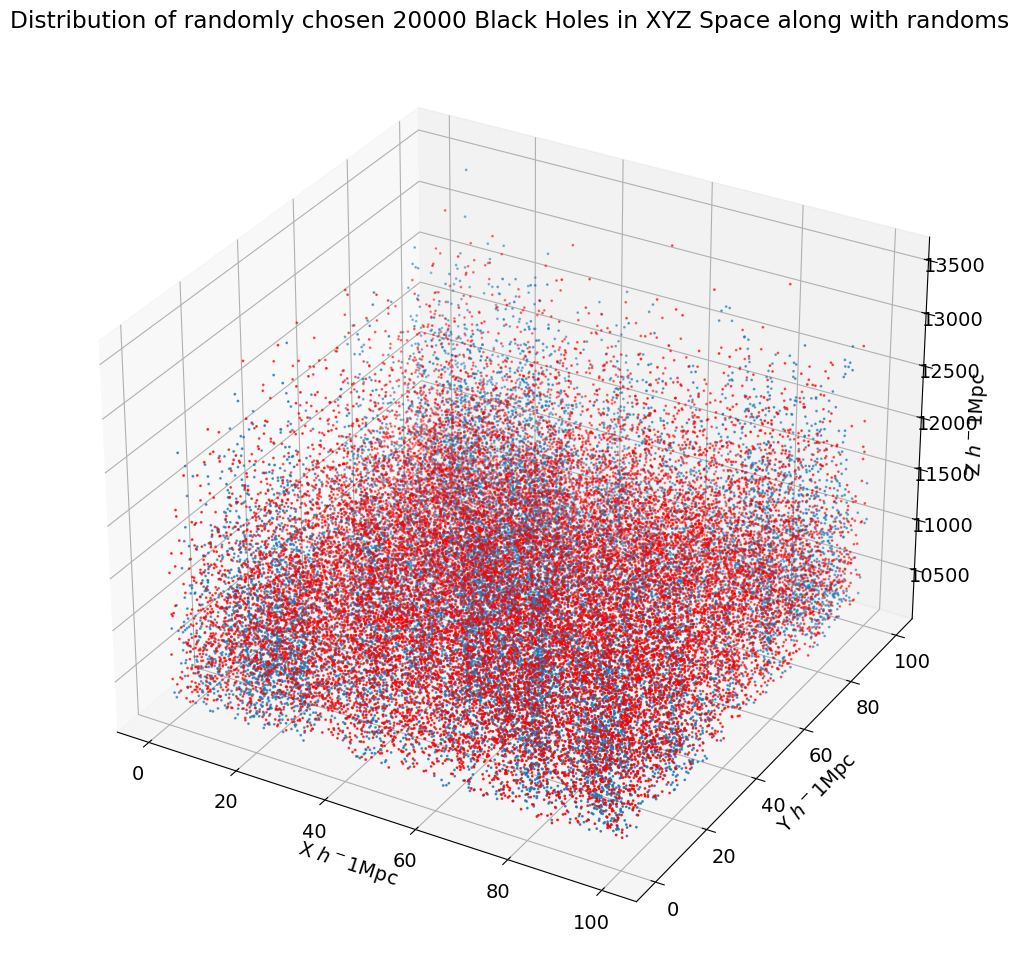

In [44]:
## Create a 3D scatter plot
fig = plt.figure(figsize=(12, 12)) # Increase figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, s=1)  # Decrease marker size

# Plotting together the subset of random points drawn randomly
# randomly draw num_black_holes from the randoms
random_indices = np.random.choice(len(rand_x), num_black_holes, replace=False)
sub_rand_x = rand_x[random_indices]
sub_rand_y = rand_y[random_indices]
sub_rand_z = rand_z[random_indices]
ax.scatter(sub_rand_x, sub_rand_y, sub_rand_z, s=1, c='r')  # Decrease marker size

# Set labels and title
ax.set_xlabel(r'X $h^-1$Mpc')
ax.set_ylabel(r'Y $h^-1$Mpc')
ax.set_zlabel(r'Z $h^-1$Mpc')
ax.set_title('Distribution of randomly chosen {} Black Holes in XYZ Space along with randoms'.format(num_black_holes))


# Show the plot
plt.show()

### Trying to assess the bin size necessary to get a reasonable pair count in each bin.

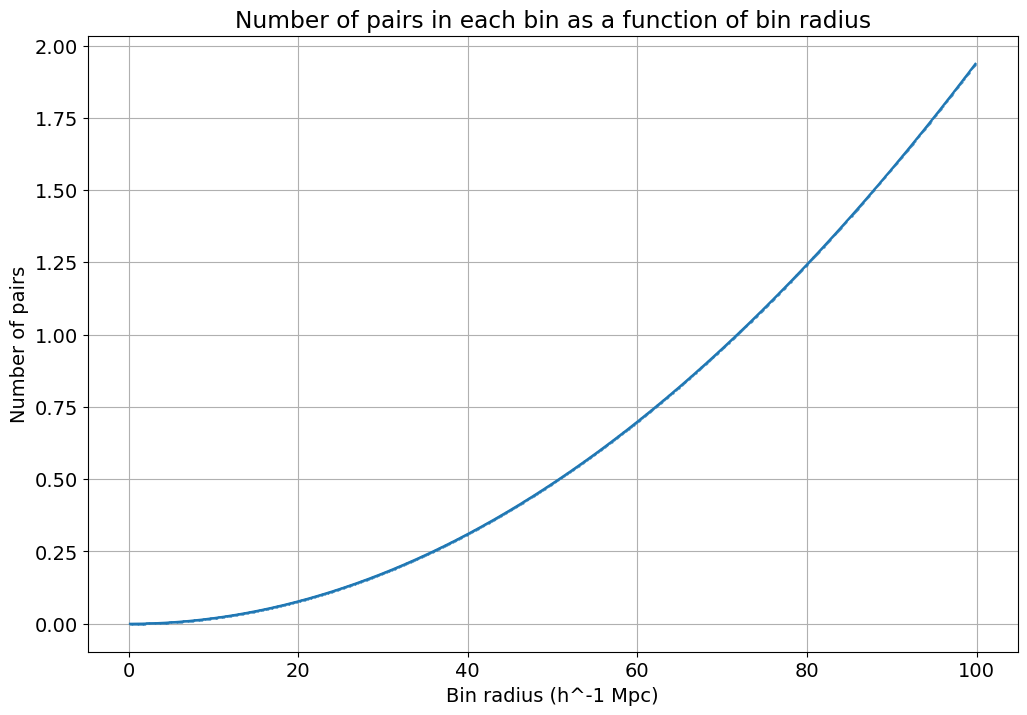

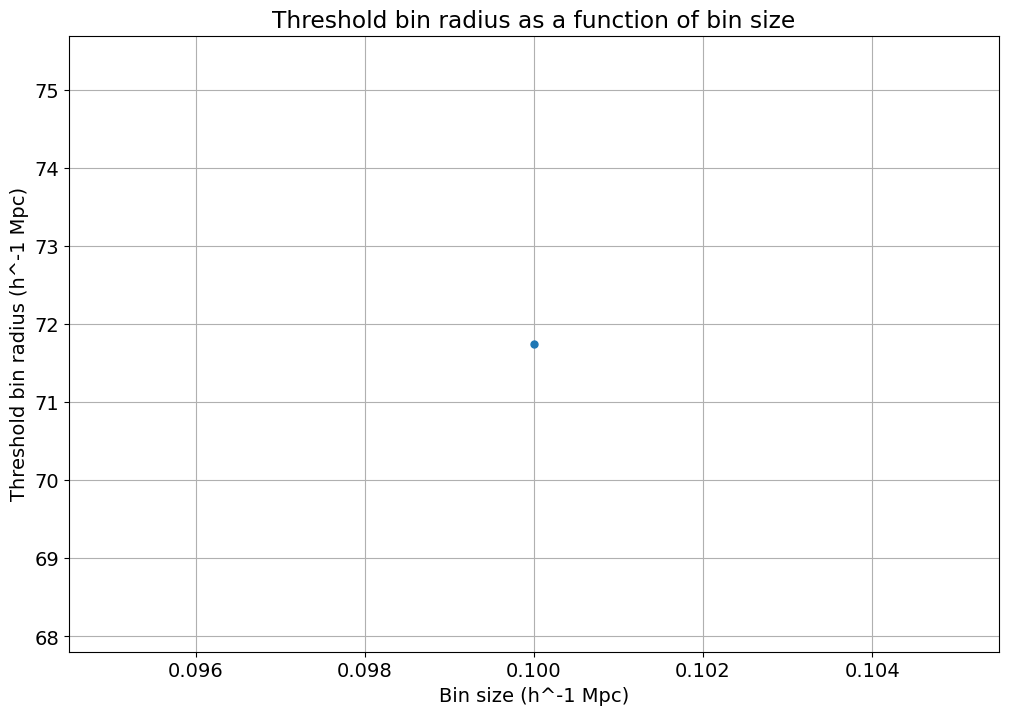

In [19]:
# I have the number density of subset of black holes in the box.
# Since I am looking at the pair counts in radial bins for the correlation function, I wanna roughly estimate the number of pairs in each bin.
# I can use the number density to estimate the number of pairs in each bin.

# Define the number of black holes to choose for the subset
num_black_holes = 5000

# Define the number density of black holes
number_density = num_black_holes / volume

# Define the bin size for the correlation function
bin_size = 0.1  # h^-1 Mpc

# Define the radial bins
bins = np.arange(0.1, 100, bin_size)

# Calculate the volume of each bin
bin_volumes = (4/3) * np.pi * (bins[1:]**3 - bins[:-1]**3)

# Calculate the number of pairs in each bin
num_pairs = number_density * bin_volumes

# Now I want to represent the number of pairs in each bin as a function of the bin radius.

# Calculate the bin radius
bin_radius = (bins[1:] + bins[:-1]) / 2

# Plot the number of pairs in each bin as a function of the bin radius
plt.figure(figsize=(12, 8))
plt.plot(bin_radius, num_pairs, marker='.', linestyle='-', markersize=1)
plt.xlabel('Bin radius (h^-1 Mpc)')
plt.ylabel('Number of pairs')
plt.title('Number of pairs in each bin as a function of bin radius')
plt.grid(True)
plt.show()



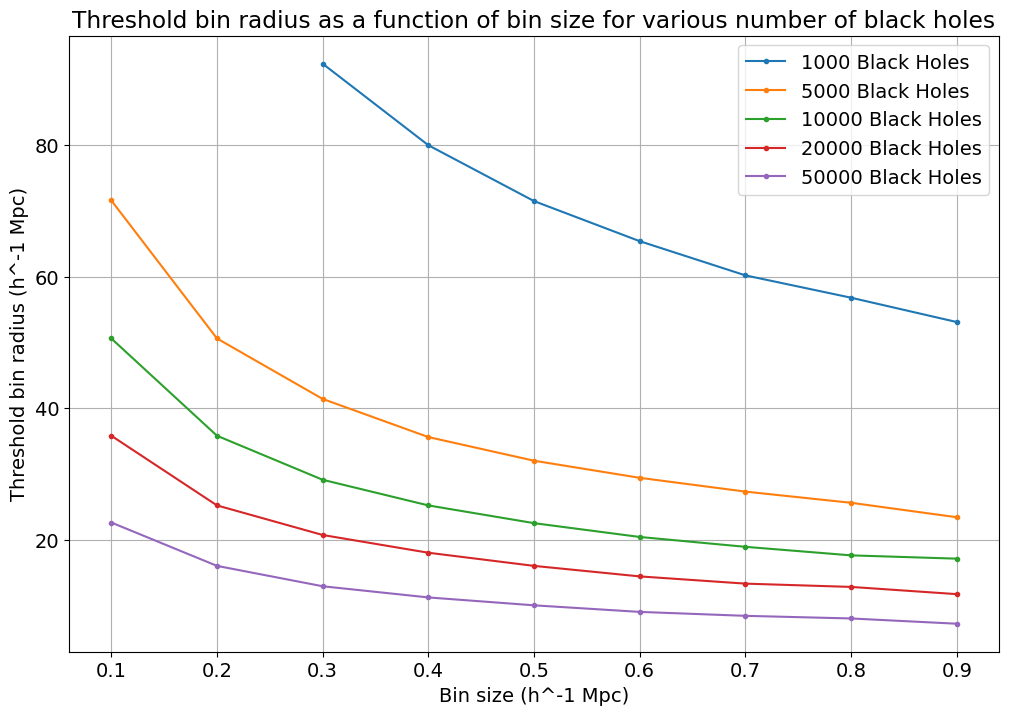

In [36]:
# Let's run a loop through various bin sizes and various number of black holes to choose for the subset 
# and calculate the number of pairs in each bin as a function of the bin radius.
# then let's look at at what bin radius does the number of pairs in each bin become more than a threshold value.
# Then we have to plot threshold bin radius as a function of the bin size for various number of black holes choosen.

# Define the number of black holes to choose for the subset
num_black_holes_ar = [1000, 5000, 10000, 20000, 50000]

# Define the bin sizes for the correlation function
bin_size_ar = np.arange(0.1, 1, 0.1)  # h^-1 Mpc

# Define the threshold number of pairs
threshold_pairs = 1

# Initialize an empty list to store the threshold bin radii
threshold_radii = []

# Loop over the number of black holes
for num_black_holes in num_black_holes_ar:
    # Define the number density of black holes
    number_density = num_black_holes / volume
    
    # Initialize an empty list to store the threshold radii for each bin size
    threshold_radii_ar = []
    
    # Loop over the bin sizes
    for bin_size in bin_size_ar:
        # Define the radial bins
        bins = np.arange(0.1, 100, bin_size)
        
        # Calculate the volume of each bin
        bin_volumes = (4/3) * np.pi * (bins[1:]**3 - bins[:-1]**3)
        
        # Calculate the number of pairs in each bin
        num_pairs = number_density * bin_volumes
        
        # Find the bin radius where the number of pairs exceeds the threshold
        threshold_radius = bin_size * np.argmax(num_pairs >= threshold_pairs)
        
        # compair num_pairs array with threshold_pairs to see if all element is less than threshold_pairs
        if np.all(num_pairs < threshold_pairs):
            threshold_radius = np.nan 
        
        # Append the threshold radius to the list
        threshold_radii_ar.append(threshold_radius)
    
    # Append the threshold radii for each bin size to the main list
    threshold_radii.append(threshold_radii_ar)

# Convert the threshold radii to a numpy array
threshold_radii = np.array(threshold_radii)

# Now I want to plot the threshold bin radius as a function of the bin size for various number of black holes choosen. 

# Plot the threshold bin radius as a function of the bin size for various number of black holes
plt.figure(figsize=(12, 8))
for i, num_black_holes in enumerate(num_black_holes_ar):
    plt.plot(bin_size_ar, threshold_radii[i], marker='.', linestyle='-', label='{} Black Holes'.format(num_black_holes))
plt.xlabel('Bin size (h^-1 Mpc)')
plt.ylabel('Threshold bin radius (h^-1 Mpc)')
plt.title('Threshold bin radius as a function of bin size for various number of black holes')
plt.legend()
plt.grid(True)
plt.show()


### Applying the incompleteness

In [ ]:
# Now i have bh_coordinates array as an array containing the position of many black holes from the light cone constructed.
# I can choose a subset of black holes from this array and use it to find the correlation function.
# Let me take the subset we have choosen in the previous cell and calculate the correlation function.

# Let's randomly select a subset of the black holes and plot the distribution in the x-y-z space.

# Define the number of black holes to show in the plot
num_black_holes = 30000

# randomly draw num_black_holes from the bh_coordinates
random_indices = np.random.choice(bh_coordinates.shape[0], num_black_holes, replace=False)
random_bh_coordinates = bh_coordinates[random_indices]

# Get the z coordinates of the black holes
z_coords = random_bh_coordinates[:, 2]

# Get the x and y coordinates of the black holes
x_coords = random_bh_coordinates[:, 0]
y_coords = random_bh_coordinates[:, 1]

# Define the subset of black holes to use for the correlation function
bh_pos_x = x_coords
bh_pos_y = y_coords
bh_pos_z = z_coords

min_x = 0
max_x = 100 # h^-1 Mpc. Here x_coords, y_coords, z_coords are in h^-1 Mpc unlike the black holes coordinates directly from the MBII data.
min_y = 0
max_y = 100

mult = 10 ## Number of random points used as a multiple of number of data points
z_bin_size = 0.005   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [0.5]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.arange(0.01, 100, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))

from pandas import DataFrame

df = DataFrame({"r min":bins[0:-1], "r max":bins[1:], "DD count":DD_count, "DR count":DR_count, "RR count": RR_count, "Landy Szalay":LandSzal2pcf, "Pois Error":pois_err})

#Save the data to a file
df.to_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc3k.csv', index=False)

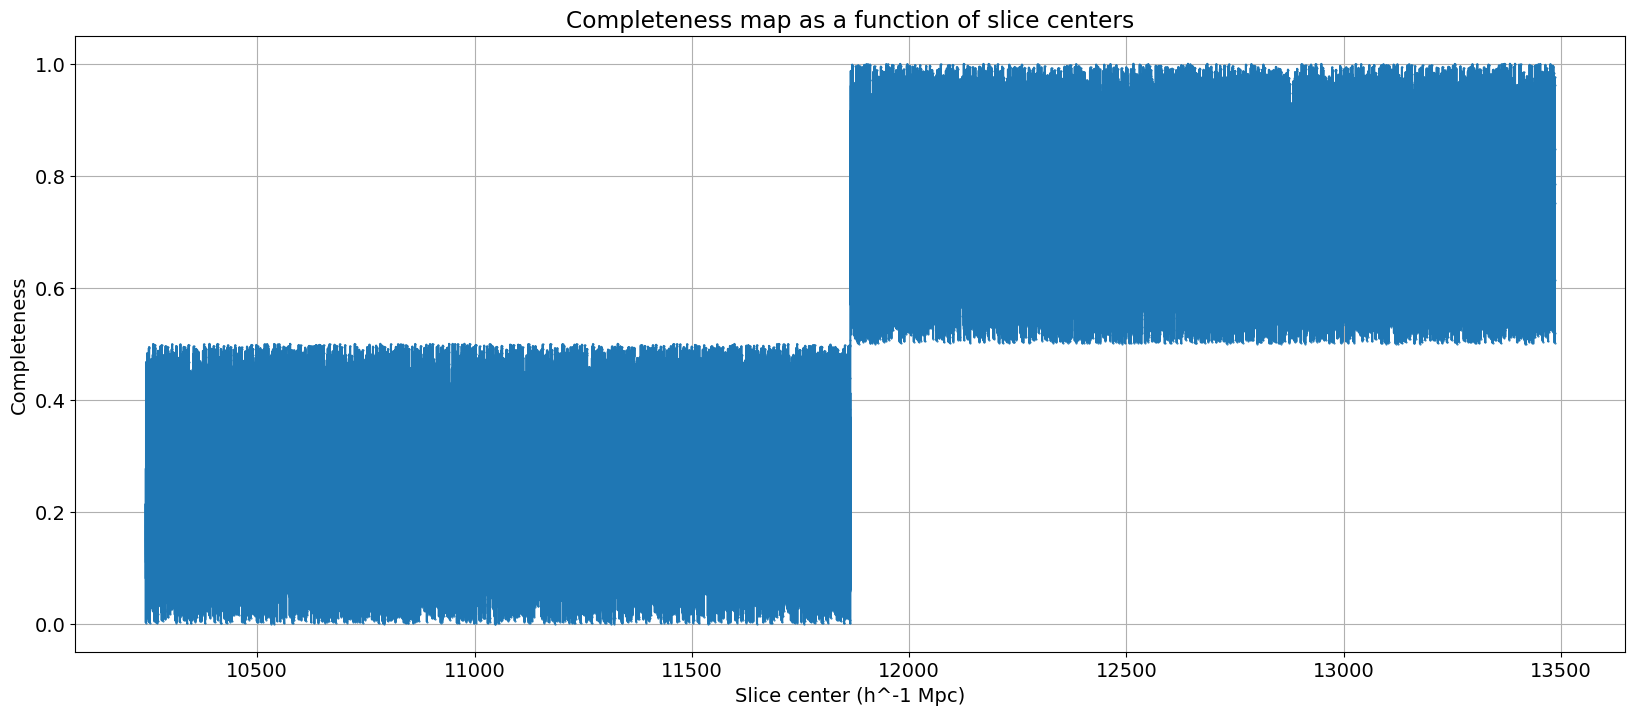

In [58]:
# I want to make a completeness map of the light cone constructed. Basically it is a function of z, which gives the fraction of the black holes in the light cone that are detected at a given redshift.
# First we have to bin the z axis into slices of 0.1 h^-1 Mpc, inorder to assign incompleteness to each slice.

# Define the slice size
slice_size = 0.1  # h^-1 Mpc

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value / h # h^-1 Mpc
end_comoving = cosmo.comoving_distance(end_z).value / h

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# Define the completeness map as a function of slice centers, completeness is a random number between 0 and 1.
# Assign the first half of slices values between 0 and 0.5 and the second half values between 0.5 and 1.
completeness_map = np.zeros(num_slices)
completeness_map[:num_slices//2] = np.random.uniform(0, 0.5, num_slices//2)
completeness_map[num_slices//2:] = np.random.uniform(0.5, 1, num_slices - num_slices//2)

# Now I want to plot the completeness map as a function of the slice centers.

# Plot the completeness map as a function of the slice centers
plt.figure(figsize=(20, 8))
plt.plot(slice_centers, completeness_map, marker='.', linestyle='-', markersize=1)
plt.xlabel('Slice center (h^-1 Mpc)')
plt.ylabel('Completeness')
plt.title('Completeness map as a function of slice centers')
plt.grid(True)
plt.show()


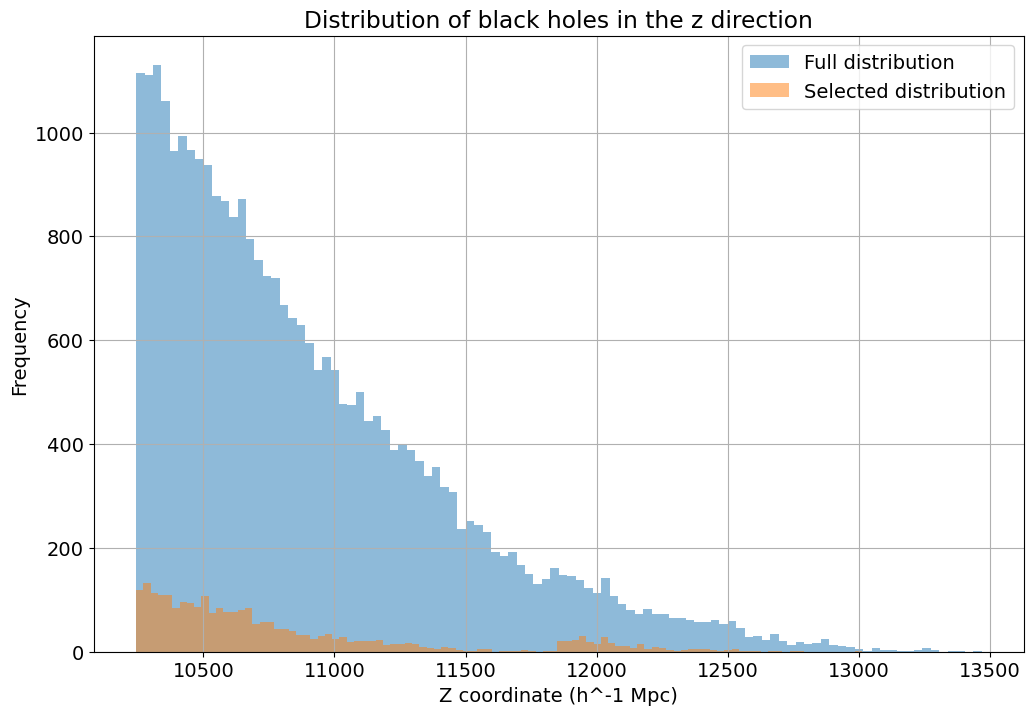

/tmp/ipykernel_21604/2176178452.py:219: RuntimeWarning: divide by zero encountered in divide
  pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))


In [59]:
# Completenss map is basically the number of black holes that are selected from the given slice out of the total black holes in the slice.
# x_coords, y_coords, z_coords are the coordinates of the black holes in the light cone constructed.
# I want to find the slice to which each black hole belongs and choose randomly a fraction of black holes from each slice according to the completeness map.

# Define the number of black holes to choose for the subset
num_black_holes = 30000

# randomly draw num_black_holes from the bh_coordinates
random_indices = np.random.choice(bh_coordinates.shape[0], num_black_holes, replace=False)
random_bh_coordinates = bh_coordinates[random_indices]

# Get the z coordinates of the black holes
z_coords = random_bh_coordinates[:, 2]

# Get the x and y coordinates of the black holes
x_coords = random_bh_coordinates[:, 0]
y_coords = random_bh_coordinates[:, 1]

# Define the subset of black holes to use for the correlation function
bh_pos_x = x_coords
bh_pos_y = y_coords
bh_pos_z = z_coords

# Define the slice size
slice_size = 0.1  # h^-1 Mpc

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value / h # h^-1 Mpc
end_comoving = cosmo.comoving_distance(end_z).value / h

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# Define the completeness map as a function of slice centers, completeness is a random number between 0 and 1.
# Assign the first half of slices values between 0 and 0.5 and the second half values between 0.5 and 1.
completeness_map = np.zeros(num_slices)
completeness_map[:num_slices//2] = np.random.uniform(0, 0.5, num_slices//2)
completeness_map[num_slices//2:] = np.random.uniform(0.5, 1, num_slices - num_slices//2)

# Assign each black hole to a slice based on its z coordinate
slice_indices = np.digitize(z_coords, slice_z_coords[1:], right=True)

# Choose a fraction of black holes from each slice based on the completeness map
selected_bh_indices = []
for i in range(1, num_slices + 1):
    slice_bh_indices = np.where(slice_indices == i)[0]
    num_bh_in_slice = len(slice_bh_indices)
    num_selected_bh = int(completeness_map[i - 1] * num_bh_in_slice)
    selected_slice_bh_indices = np.random.choice(slice_bh_indices, num_selected_bh, replace=False)
    selected_bh_indices.extend(selected_slice_bh_indices)

# Get the selected black hole coordinates
selected_bh_coordinates = random_bh_coordinates[selected_bh_indices]

# Get the z coordinates of the selected black holes
selected_z_coords = selected_bh_coordinates[:, 2]

# Get the x and y coordinates of the selected black holes
selected_x_coords = selected_bh_coordinates[:, 0]
selected_y_coords = selected_bh_coordinates[:, 1]

# Now I want to plot the distribution of the selected black holes in z direction and compare it with the full distribution.

# Create a histogram of the z coordinates of the selected black holes
plt.figure(figsize=(12, 8))
plt.hist(z_coords, bins=100, alpha=0.5, label='Full distribution')
plt.hist(selected_z_coords, bins=100, alpha=0.5, label='Selected distribution')
plt.xlabel('Z coordinate (h^-1 Mpc)')
plt.ylabel('Frequency')
plt.title('Distribution of black holes in the z direction')
plt.legend()
plt.grid(True)
plt.show()

# Now I want to calculate the correlation function using the selected black holes and compare it with the correlation function using all black holes.
# Full balck holes correlation function.

min_x = 0
max_x = 100 # h^-1 Mpc. Here x_coords, y_coords, z_coords are in h^-1 Mpc unlike the black holes coordinates directly from the MBII data.
min_y = 0
max_y = 100

mult = 10 ## Number of random points used as a multiple of number of data points
z_bin_size = 0.005   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [0.5]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.arange(0.01, 100, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))

from pandas import DataFrame

df = DataFrame({"r min":bins[0:-1], "r max":bins[1:], "DD count":DD_count, "DR count":DR_count, "RR count": RR_count, "Landy Szalay":LandSzal2pcf, "Pois Error":pois_err})

#Save the data to a file
df.to_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc30k.csv', index=False)

# Selected black holes correlation function.

bh_pos_x = selected_x_coords
bh_pos_y = selected_y_coords
bh_pos_z = selected_z_coords

min_x = 0
max_x = 100 # h^-1 Mpc. Here x_coords, y_coords, z_coords are in h^-1 Mpc unlike the black holes coordinates directly from the MBII data.
min_y = 0
max_y = 100

mult = 10 ## Number of random points used as a multiple of number of data points
z_bin_size = 0.005   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [0.5]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.arange(0.01, 100, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))

from pandas import DataFrame

df = DataFrame({"r min":bins[0:-1], "r max":bins[1:], "DD count":DD_count, "DR count":DR_count, "RR count": RR_count, "Landy Szalay":LandSzal2pcf, "Pois Error":pois_err})

#Save the data to a file
df.to_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc30k_incomp.csv', index=False)

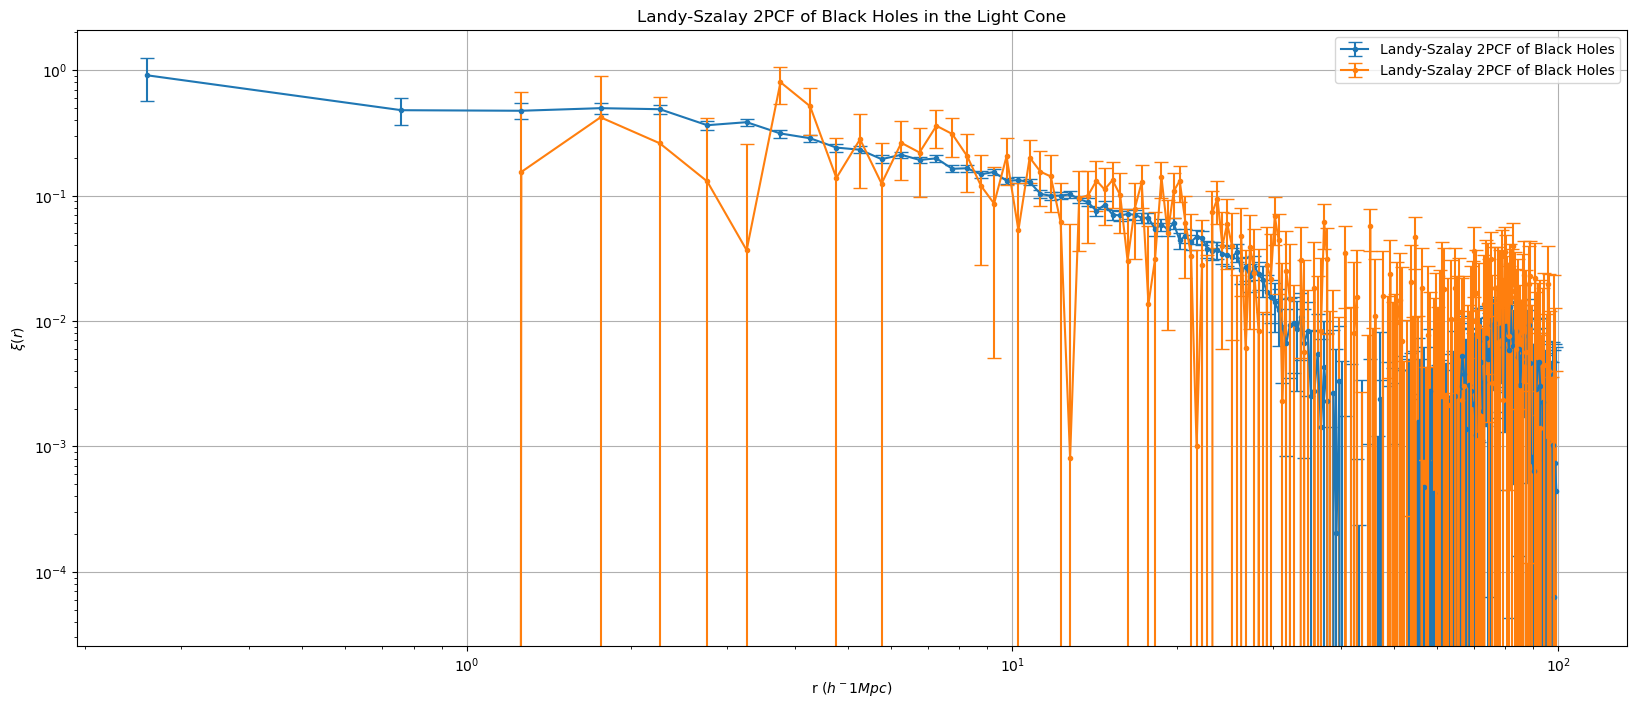

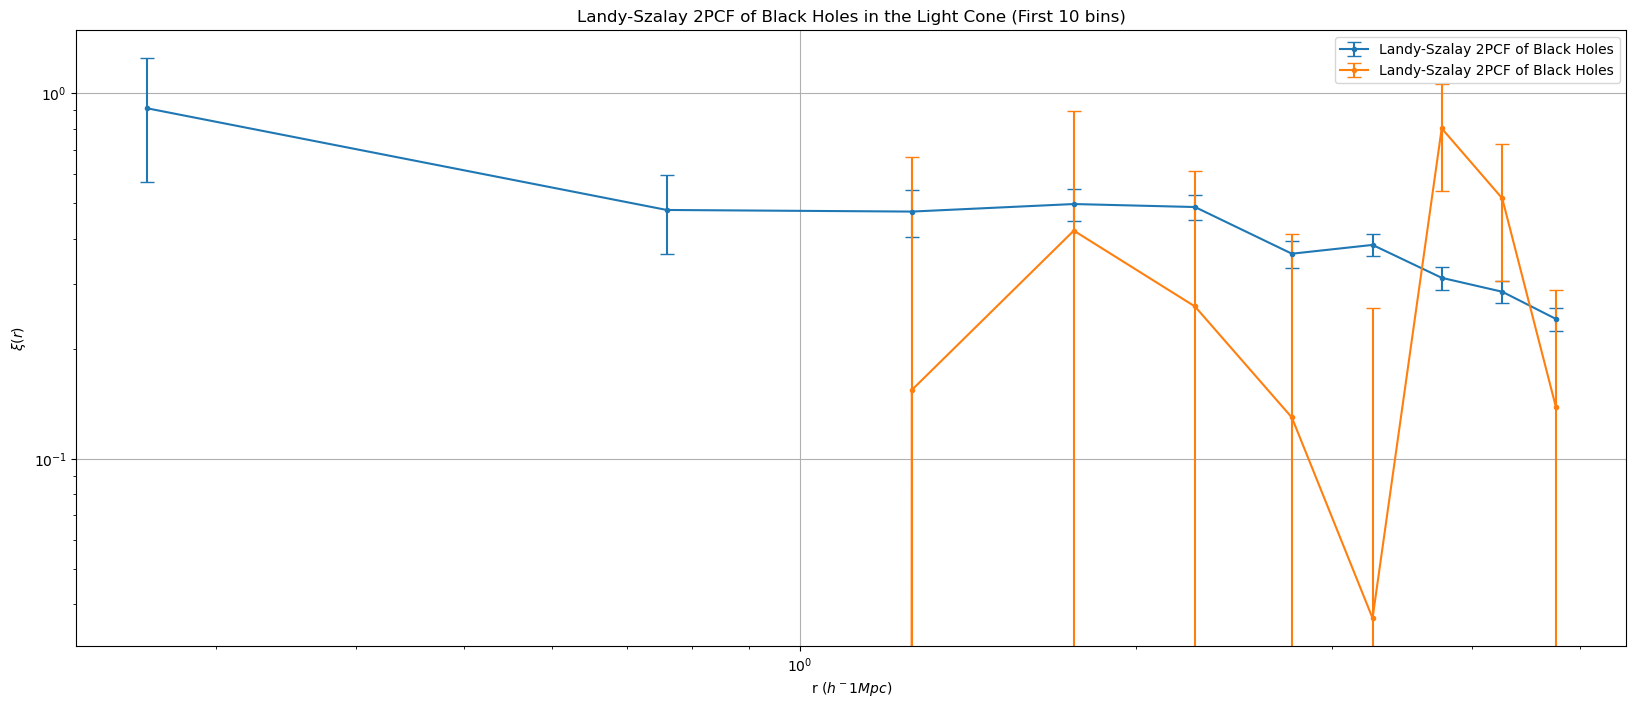

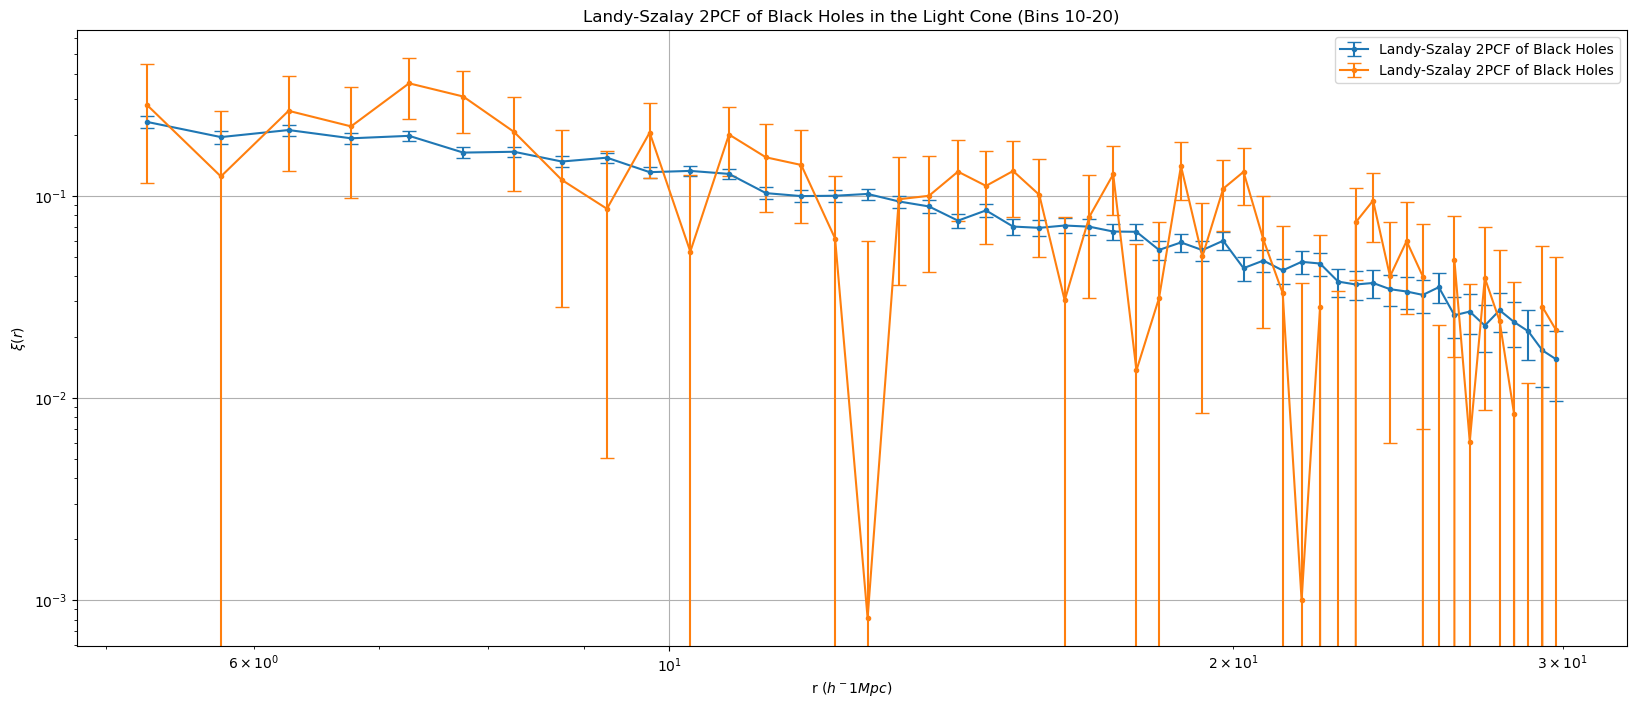

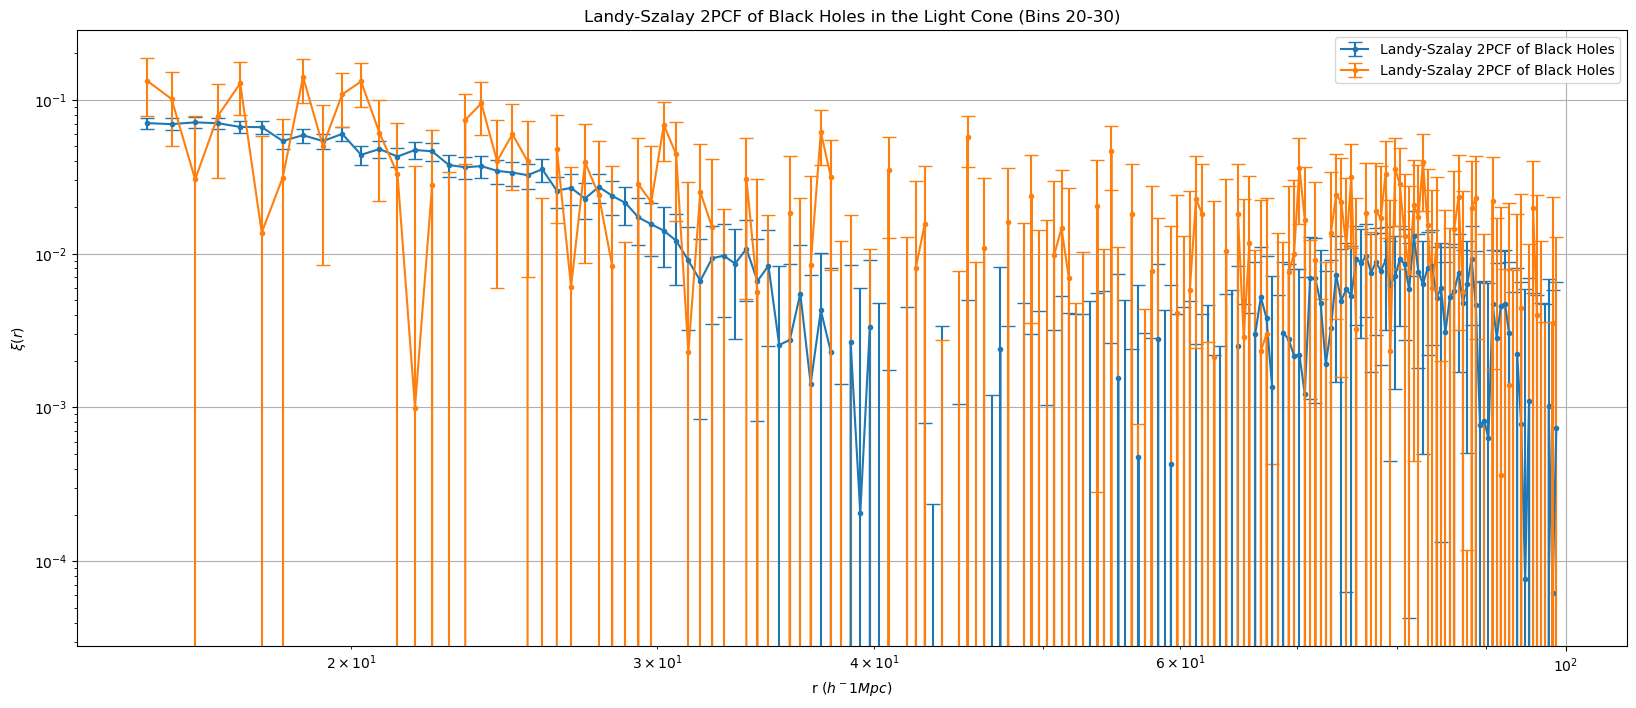

In [14]:
# Now let's plot the correlation function using all black holes and the correlation function using the selected black holes.
# We need to first load the correlation function data from the files.

import pandas as pd
import matplotlib.pyplot as plt

# Define the data directory
DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

# Load the correlation function data from the file
df = pd.read_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc30k.csv')
df1 = pd.read_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc30k_incomp.csv')

# Find the midpoint of the radial bins
df['r mid'] = (df['r min'] + df['r max']) / 2
df1['r mid'] = (df1['r min'] + df1['r max']) / 2

# Number of black holes in the subset
# num_black_holes = len(bh_pos_x)
# num_selected_black_holes = len(selected_x_coords)

# Plot the correlation function as error bars, but error contains negative values, only use positive values and leave the negative values.
plt.figure(figsize=(20, 8))
plt.errorbar(df['r mid'], df['Landy Szalay'], yerr=df['Pois Error'], fmt='.-', capsize=5, label='Landy-Szalay 2PCF of Black Holes')
plt.errorbar(df1['r mid'], df1['Landy Szalay'], yerr=df1['Pois Error'], fmt='.-', capsize=5, label='Landy-Szalay 2PCF of Black Holes')
plt.xlabel(r'r ($h^-1 Mpc$)')
plt.ylabel(r'$\xi(r)$')
plt.title('Landy-Szalay 2PCF of Black Holes in the Light Cone')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
# setting the range of x-axis
# plt.xlim(10, 100)

plt.show()

# Now let's plot different sections of the correlation function data seperately. We already have the correlation function data from the files and all the imports.


# Plot the correlation function data in different sections
start_section = 0
end_section = 10
plt.figure(figsize=(20, 8))
plt.errorbar(df['r mid'][start_section:end_section], df['Landy Szalay'][start_section:end_section], yerr=df['Pois Error'][start_section:end_section], fmt='.-', capsize=5, label='Landy-Szalay 2PCF of Black Holes')
plt.errorbar(df1['r mid'][start_section:end_section], df1['Landy Szalay'][start_section:end_section], yerr=df1['Pois Error'][start_section:end_section], fmt='.-', capsize=5, label='Landy-Szalay 2PCF of Black Holes')
plt.xlabel(r'r ($h^-1 Mpc$)')
plt.ylabel(r'$\xi(r)$')
plt.title('Landy-Szalay 2PCF of Black Holes in the Light Cone (First 10 bins)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.show()

# Plot the correlation function data in different sections
start_section = 10
end_section = 60
plt.figure(figsize=(20, 8))
plt.errorbar(df['r mid'][start_section:end_section], df['Landy Szalay'][start_section:end_section], yerr=df['Pois Error'][start_section:end_section], fmt='.-', capsize=5, label='Landy-Szalay 2PCF of Black Holes')
plt.errorbar(df1['r mid'][start_section:end_section], df1['Landy Szalay'][start_section:end_section], yerr=df1['Pois Error'][start_section:end_section], fmt='.-', capsize=5, label='Landy-Szalay 2PCF of Black Holes')
plt.xlabel(r'r ($h^-1 Mpc$)')
plt.ylabel(r'$\xi(r)$')
plt.title('Landy-Szalay 2PCF of Black Holes in the Light Cone (Bins 10-20)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.show()

# Plot the correlation function data in different sections
start_section = 30
end_section = -1
plt.figure(figsize=(20, 8))
plt.errorbar(df['r mid'][start_section:end_section], df['Landy Szalay'][start_section:end_section], yerr=df['Pois Error'][start_section:end_section], fmt='.-', capsize=5, label='Landy-Szalay 2PCF of Black Holes')
plt.errorbar(df1['r mid'][start_section:end_section], df1['Landy Szalay'][start_section:end_section], yerr=df1['Pois Error'][start_section:end_section], fmt='.-', capsize=5, label='Landy-Szalay 2PCF of Black Holes')
plt.xlabel(r'r ($h^-1 Mpc$)')
plt.ylabel(r'$\xi(r)$')
plt.title('Landy-Szalay 2PCF of Black Holes in the Light Cone (Bins 20-30)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.show()
